# Regional Plots

In [71]:
import geopandas as gpd
import shapefile
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import xarray as xr
import xoak
from datetime import datetime as dt
import glob
import fiona

import geopandas as gpd
import pandas as pd
import regionmask
import numpy as np
import copy
from shapely.geometry import Point
from matplotlib import rc
import matplotlib.dates as mdates
from scipy.stats import mannwhitneyu, levene

## Regions Plots

In [266]:
#create state regions within the CONUS shapefile
regions = {'SP': ['TX', 'OK', 'KS'],
           'NP': ['NE', 'SD', 'ND'],
           'MW': ['WI', 'MI', 'OH', 'IL', 'IN', 'MN', 'IA', 'MO', 'KY'],
           'SE': ['AR', 'LA', 'TN', 'MS', 'AL', 'SC', 'NC', 'FL', 'GA'],
           'NE': ['NJ', 'PA', 'NY', 'VT', 'NH', 'CT', 'VA', 'WV', 'MD', 'DC', 'DE', 'RI', 'MA', 'ME'],
           'EC': []}

#ECONUS is comprised of states in all other regions
[regions['EC'].extend(regions[x]) for x in regions.keys() if x!='EC'];

region_names = {'EC': 'ECONUS', 
                'NP': 'Northern Plains', 
                'SP': 'Southern Plains', 
                'MW': 'Midwest', 
                'SE': 'Southeast', 
                'NE': 'Northeast'}

#load an USA shapefile
usa = gpd.read_file("/home/jcorner1/Unidata/shapefiles/USA/CONUS.shp")
usa

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677997539,1323452846,+41.5974187,-071.5272723,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214048160737,2393355752,+44.3484222,-114.5588538,"POLYGON ((-116.89971 44.84061, -116.89967 44.8..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23187445452,1028643155,+43.6726907,-071.5843145,"POLYGON ((-72.32990 43.60021, -72.32984 43.600..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125919712692,13470113896,+35.5397100,-079.1308636,"POLYGON ((-82.41674 36.07283, -82.41660 36.073..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23873457570,1031134839,+44.0604795,-072.6733274,"POLYGON ((-73.31328 44.26413, -73.31274 44.265..."


<Figure size 1700x1500 with 0 Axes>

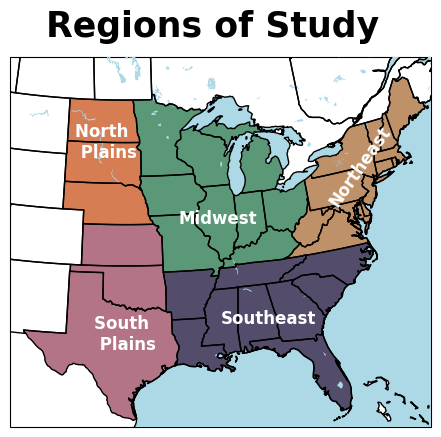

In [3]:
#create the figure
fig = plt.figure(figsize=(17,15))
plt.figure()
plt.suptitle('Regions of Study', size=25).set_weight('bold')

#plot the data
ax = plt.subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=-98, central_latitude=35))
i=0
colors = ['#b37486', '#d67d53', '#5b9877', '#534d6b', '#bf9169']

#iterate through the regions
for key, value in regions.items():
    if key != 'EC':
        sub_us = usa[(usa['STUSPS'].isin(value))].copy()
        ax.add_geometries(sub_us['geometry'], crs = cartopy.crs.PlateCarree(), linewidth=0.1, zorder = 11, color = colors[i])
        i = i + 1

#ax.add_feature(cartopy.feature.STATES, zorder=2)
ax.add_feature(cartopy.feature.COASTLINE, zorder = 12)
ax.add_feature(cartopy.feature.LAND, facecolor='white')
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue', zorder = 11)
ax.add_feature(cartopy.feature.LAKES, facecolor='lightblue', zorder = 13)
ax.add_feature(cartopy.feature.STATES, zorder=15)
ax.set_extent([-107, -74, 25, 50])

#annotate regions of study
ax.annotate(f'North \n Plains', xy=(0.155,0.73), xycoords='axes fraction', fontsize=12, weight='bold', zorder = 15, color ='white')
ax.annotate(f'South \n Plains', xy=(0.2,0.21), xycoords='axes fraction', fontsize=12, weight='bold', zorder = 15, color ='white')
ax.annotate(f'Midwest', xy=(0.4,0.55), xycoords='axes fraction', fontsize=12, weight='bold', zorder = 15, color ='white')
ax.annotate(f'Southeast', xy=(0.5,0.28), xycoords='axes fraction', fontsize=12, weight='bold', zorder = 15, color ='white')
ax.annotate(f'Northeast', xy=(0.75,0.6), xycoords='axes fraction', fontsize=12, weight='bold', zorder = 15, ha='left', rotation=55, color ='white')

#save figure
plt.savefig('/home/jcorner1/Future_Modes/Plots/regions_of_study.png', format='png', dpi=500, bbox_inches='tight')

## Load Data

In [4]:
def convert_xy_to_latlon(points_in):

    geog = xr.open_dataset("/home/scratch/WRF_BCC/geography/geo_em.d01.nc")

    lons = geog.CLONG.values[0,:,:]
    lats = geog.CLAT.values[0,:,:]
        
    points_in['lon'] = [lons[int(y), int(x)] for y, x in zip(points_in['y'], points_in['x'])]
    points_in['lat'] = [lats[int(y), int(x)] for y, x in zip(points_in['y'], points_in['x'])]

    gpd_points = gpd.GeoDataFrame(points_in, geometry=gpd.points_from_xy(points_in.lon, points_in.lat))

    gpd_points = gpd_points.set_crs('epsg:4269')
    
    return gpd_points

In [5]:
#iterate through the epochs
epochs = ['HIST', 'MID4p5', 'MID8p5', 'END4p5', 'END8p5']
epoch_labels = ['HIST', 'MID4.5', 'MID8.5', 'END4.5', 'END8.5']
usa = usa.to_crs('EPSG:4269')

for epoch in epochs:
    
    #load wrf-bcc dataframes and append appropiate information to dataframe.
    print(epoch)
    locals()[f'df_{epoch}'] = pd.concat(map(pd.read_csv, glob.glob(f'/home/scratch/jcorner1/Thesis/future_modes/modes/{epoch}/*')), ignore_index=True)
    locals()[f'df_{epoch}']['Time'] = pd.to_datetime(locals()[f'df_{epoch}']['Time'])
    locals()[f'df_{epoch}']['Month'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.month
    locals()[f'df_{epoch}']['Year'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.year
    locals()[f'df_{epoch}']['Day'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.day
    locals()[f'df_{epoch}']['Hour'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.hour
    locals()[f'df_{epoch}']['New_Hour'] = pd.to_datetime((locals()[f'df_{epoch}']['Time']) + pd.DateOffset(hours=12)).dt.hour
    locals()[f'df_{epoch}'] = convert_xy_to_latlon(locals()[f'df_{epoch}'])
    locals()[f'df_{epoch}'] = gpd.sjoin(locals()[f'df_{epoch}'], usa, how = 'left')

HIST
MID4p5
MID8p5
END4p5
END8p5


## Regional Daily Counts

In [6]:
#function to convert water year to calendar year
def Cumu_sum(df):

    daily_counts = pd.DataFrame(index=np.arange(1,366,1))
    df['Day_of_Year'] = pd.to_datetime(df['Time']).dt.dayofyear
    
    for year in df['Year'].unique()[:-1]:
        b=[]
        
        if year == np.min(df['Year'].unique()):
            df_year = df[((df['Year'] == np.min(df['Year'].unique())) | (df['Year'] == np.max(df['Year'].unique())))]
            
            for day in np.arange(1,366,1):
                df_sub = df_year[(df_year['Day_of_Year'] == day)]
                b.append(len(df_sub))
            
            
        else:
            df_year = df[(df['Year'] == year)]
            
            for day in np.arange(1,366,1):
                df_sub = df_year[(df_year['Day_of_Year'] == day)]
                b.append(len(df_sub))
            
        daily_counts[year] = b
            
    return daily_counts

In [48]:
#iterate through the epochs
for epoch in epochs:
    
    #iterate through the regions
    for key, value in regions.items():
        
        #iterate through the modes
        for mode in locals()[f'df_{epoch}'].Mode.unique():
            
            #subset the dataframe
            sub_df = locals()[f'df_{epoch}'][(locals()[f'df_{epoch}']['STUSPS'].isin(value))].copy()
            sub_df = sub_df[(sub_df['Mode'] == mode)].copy()
            locals()[f'dailycounts_{epoch}_{key}_{mode}'] = Cumu_sum(sub_df)
            
            if epoch != 'HIST':
                locals()[f'percent_change_{epoch}_{key}_{mode}'] = ((np.mean(np.sum(locals()[f'dailycounts_{epoch}_{key}_{mode}']).values) - np.mean(np.sum(locals()[f'dailycounts_HIST_{key}_{mode}']).values))
                                                                    /np.mean(np.sum(locals()[f'dailycounts_HIST_{key}_{mode}']).values))*100
    
    if epoch != 'HIST':
        print(f'{epoch} | Cellular: {locals()[f"percent_change_{epoch}_EC_Cellular"]}, Mixed Mode: {locals()[f"percent_change_{epoch}_EC_Multicell"]}'
              f', Linear: {locals()[f"percent_change_{epoch}_EC_Linear"]}, Other: {locals()[f"percent_change_{epoch}_EC_Other"]}')

MID4p5 | Cellular: 18.5481328271809, Mixed Mode: 31.798138167564932, Linear: 23.754219348933, Other: 62.76895681851907
MID8p5 | Cellular: 27.549154380698944, Mixed Mode: 37.852288946168756, Linear: -1.4302877739001152, Other: 21.23460454073304
END4p5 | Cellular: 28.40297133344263, Mixed Mode: 48.06893466544533, Linear: 40.6258939298587, Other: 88.02492951476482
END8p5 | Cellular: 68.70010467770618, Mixed Mode: 106.67192126621647, Linear: 88.27736140511472, Other: 142.02403917495175


## Cumulative Sum Plots

In [67]:
#iterate through the epochs
for epoch in epochs:
    #iterate through the regions
    for key, value in regions.items():
        key1 = np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Cellular'].mean(axis = 1))[365] * 0.2
        key2 = np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Multicell'].mean(axis = 1))[365] * 0.2
        key3 = np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Linear'].mean(axis = 1))[365] * 0.2
        
        print(f"{epoch}, {key} | Cellular: {np.where(np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Cellular'].mean(axis = 1)) >= key1)[0][0]} - {key1}, " 
              f"Mixed Mode: {np.where(np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Multicell'].mean(axis = 1)) >= key2)[0][0]} - {key2}, "
              f"Linear: {np.where(np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Linear'].mean(axis = 1)) >= key3)[0][0]} - {key3}") 
        

HIST, SP | Cellular: 129 - 366.3066666666664, Mixed Mode: 126 - 224.54666666666668, Linear: 74 - 91.8266666666666
HIST, NP | Cellular: 171 - 258.6428571428573, Mixed Mode: 168 - 122.44285714285718, Linear: 171 - 43.65714285714286
HIST, MW | Cellular: 166 - 333.71428571428584, Mixed Mode: 162 - 236.97142857142867, Linear: 179 - 88.72857142857144
HIST, SE | Cellular: 160 - 135.7428571428572, Mixed Mode: 137 - 65.01428571428576, Linear: 101 - 18.342857142857135
HIST, NE | Cellular: 185 - 12.157142857142857, Mixed Mode: 181 - 5.600000000000001, Linear: 168 - 2.0
HIST, EC | Cellular: 148 - 1057.213333333332, Mixed Mode: 142 - 625.9066666666668, Linear: 116 - 233.05333333333348
MID4p5, SP | Cellular: 117 - 441.67999999999967, Mixed Mode: 113 - 305.2533333333336, Linear: 93 - 141.9142857142855
MID4p5, NP | Cellular: 166 - 231.2285714285715, Mixed Mode: 161 - 105.25714285714282, Linear: 162 - 36.557142857142864
MID4p5, MW | Cellular: 162 - 353.26666666666665, Mixed Mode: 158 - 258.360000000000

In [68]:
#iterate through the epochs
for epoch in epochs:

    key1 = np.cumsum(locals()[f'dailycounts_{epoch}_EC_Cellular'].mean(axis = 1))[365] * 0.2
    key2 = np.cumsum(locals()[f'dailycounts_{epoch}_EC_Multicell'].mean(axis = 1))[365] * 0.2
    key3 = np.cumsum(locals()[f'dailycounts_{epoch}_EC_Linear'].mean(axis = 1))[365] * 0.2

    print(f"{epoch} | Cellular: {np.where(np.cumsum(locals()[f'dailycounts_{epoch}_EC_Cellular'].mean(axis = 1)) >= key1)[0][0]} - {key1}, " 
          f"Mixed Mode: {np.where(np.cumsum(locals()[f'dailycounts_{epoch}_EC_Multicell'].mean(axis = 1)) >= key2)[0][0]} - {key2}, "
          f"Linear: {np.where(np.cumsum(locals()[f'dailycounts_{epoch}_EC_Linear'].mean(axis = 1)) >= key3)[0][0]} - {key3}") 

HIST | Cellular: 148 - 1057.213333333332, Mixed Mode: 142 - 625.9066666666668, Linear: 116 - 233.05333333333348
MID4p5 | Cellular: 139 - 1253.3066666666664, Mixed Mode: 131 - 824.9333333333325, Linear: 109 - 288.4133333333331
MID8p5 | Cellular: 140 - 1348.4666666666667, Mixed Mode: 135 - 862.8266666666659, Linear: 122 - 229.72000000000008
END4p5 | Cellular: 136 - 1357.493333333332, Mixed Mode: 125 - 926.7733333333326, Linear: 100 - 327.7333333333333
END8p5 | Cellular: 131 - 1783.5200000000023, Mixed Mode: 123 - 1293.573333333332, Linear: 108 - 438.78666666666606


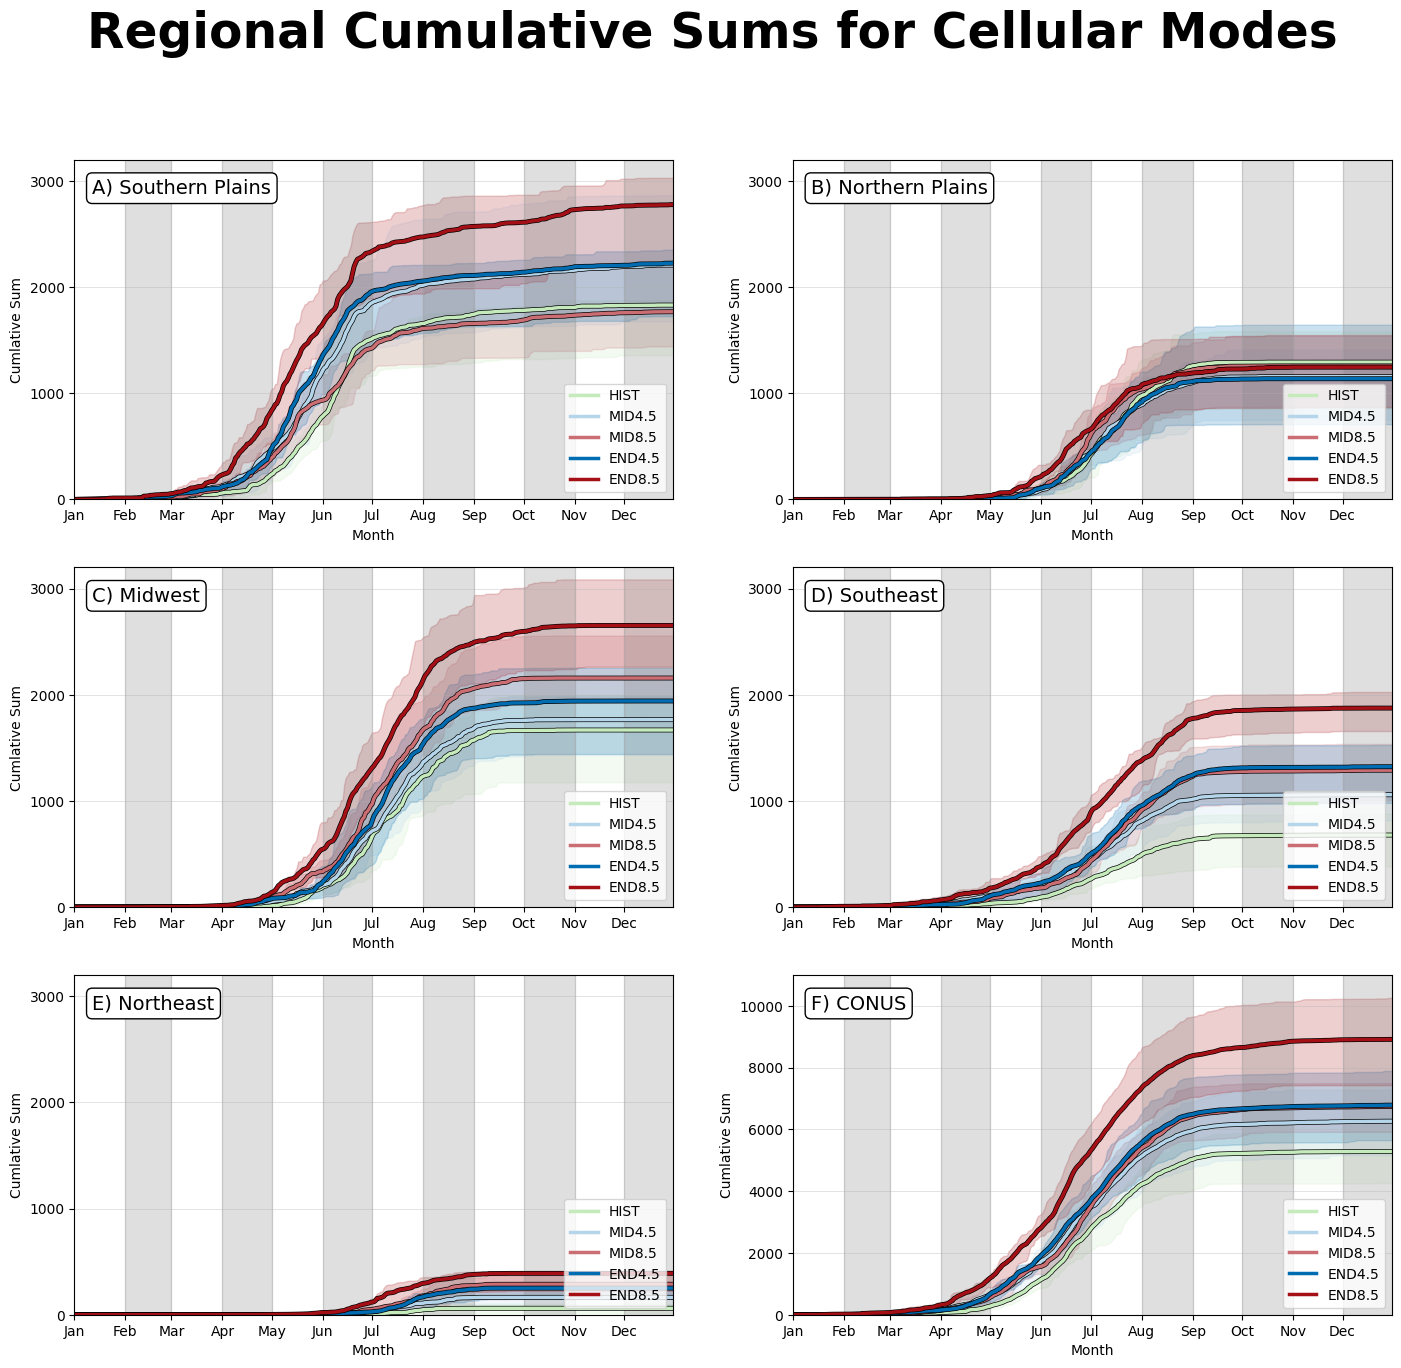

In [272]:
j = 1
fig = plt.figure(figsize=(17,15))
names = ['Southern Plains','Northern Plains', 'Midwest','Southeast','Northeast', 'CONUS']
plt.suptitle('Regional Cumulative Sums for Cellular Modes', size=35).set_weight('bold')

abc = ['A','B','C','D','E','F']

for key, value in regions.items():
    #plot the data
    fig = plt.subplot(3, 2, j)

    plt.xlabel('Month')
    plt.ylabel('Cumlative Sum')
    plt.grid(lw = 0.5, alpha = 0.5, zorder = 0.1)

    colors = ['#c5eabc', '#b5d6ea', '#ca6e74', '#006db3', '#a51017']
    i=0

    for epoch in epochs:
        plt.plot(np.arange(1, 366, 1), np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Cellular'].mean(axis = 1)), c = 'black', lw = 3.5)
        plt.plot(np.arange(1, 366, 1), np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Cellular'].mean(axis = 1)), c = colors[i], label = epoch_labels[i], lw = 2.5)
        
        q75 = np.quantile(np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Cellular']), 0.75, axis=1)
        q25 = np.quantile(np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Cellular']), 0.25, axis=1)
        plt.fill_between(np.arange(1, 366, 1), y1 = q25, y2 = q75, color = colors[i], alpha=0.2)
        
        i = i+1


    plt.axvspan(31, 59, color='grey', alpha=0.25)
    plt.axvspan(90, 120, color='grey', alpha=0.25)
    plt.axvspan(151, 181, color='grey', alpha=0.25)
    plt.axvspan(212, 243, color='grey', alpha=0.25)
    plt.axvspan(273, 304, color='grey', alpha=0.25)
    plt.axvspan(334, 365, color='grey', alpha=0.25)

    plt.xticks([0,31,59,90,120,151,181,212,243,273,304,334], labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.annotate(f'{abc[j-1]}) {names[j-1]}', (0.03,0.9),fontsize=14, 
                 bbox=dict(boxstyle='round', facecolor='w', alpha=1), xycoords='axes fraction')

    
    if j == 6:
        plt.yticks(np.arange(0,10001,2000))
        plt.ylim(0,11001)
    else:
        plt.yticks(np.arange(0,3001,1000))
        plt.ylim(0,3201)
        
    plt.legend(loc='lower right')

    plt.xlim(0, 364)
    j=j+1
plt.savefig('/home/jcorner1/Future_Modes/Plots/cellular_cumu_sum.png', format='png', dpi=500, bbox_inches='tight')

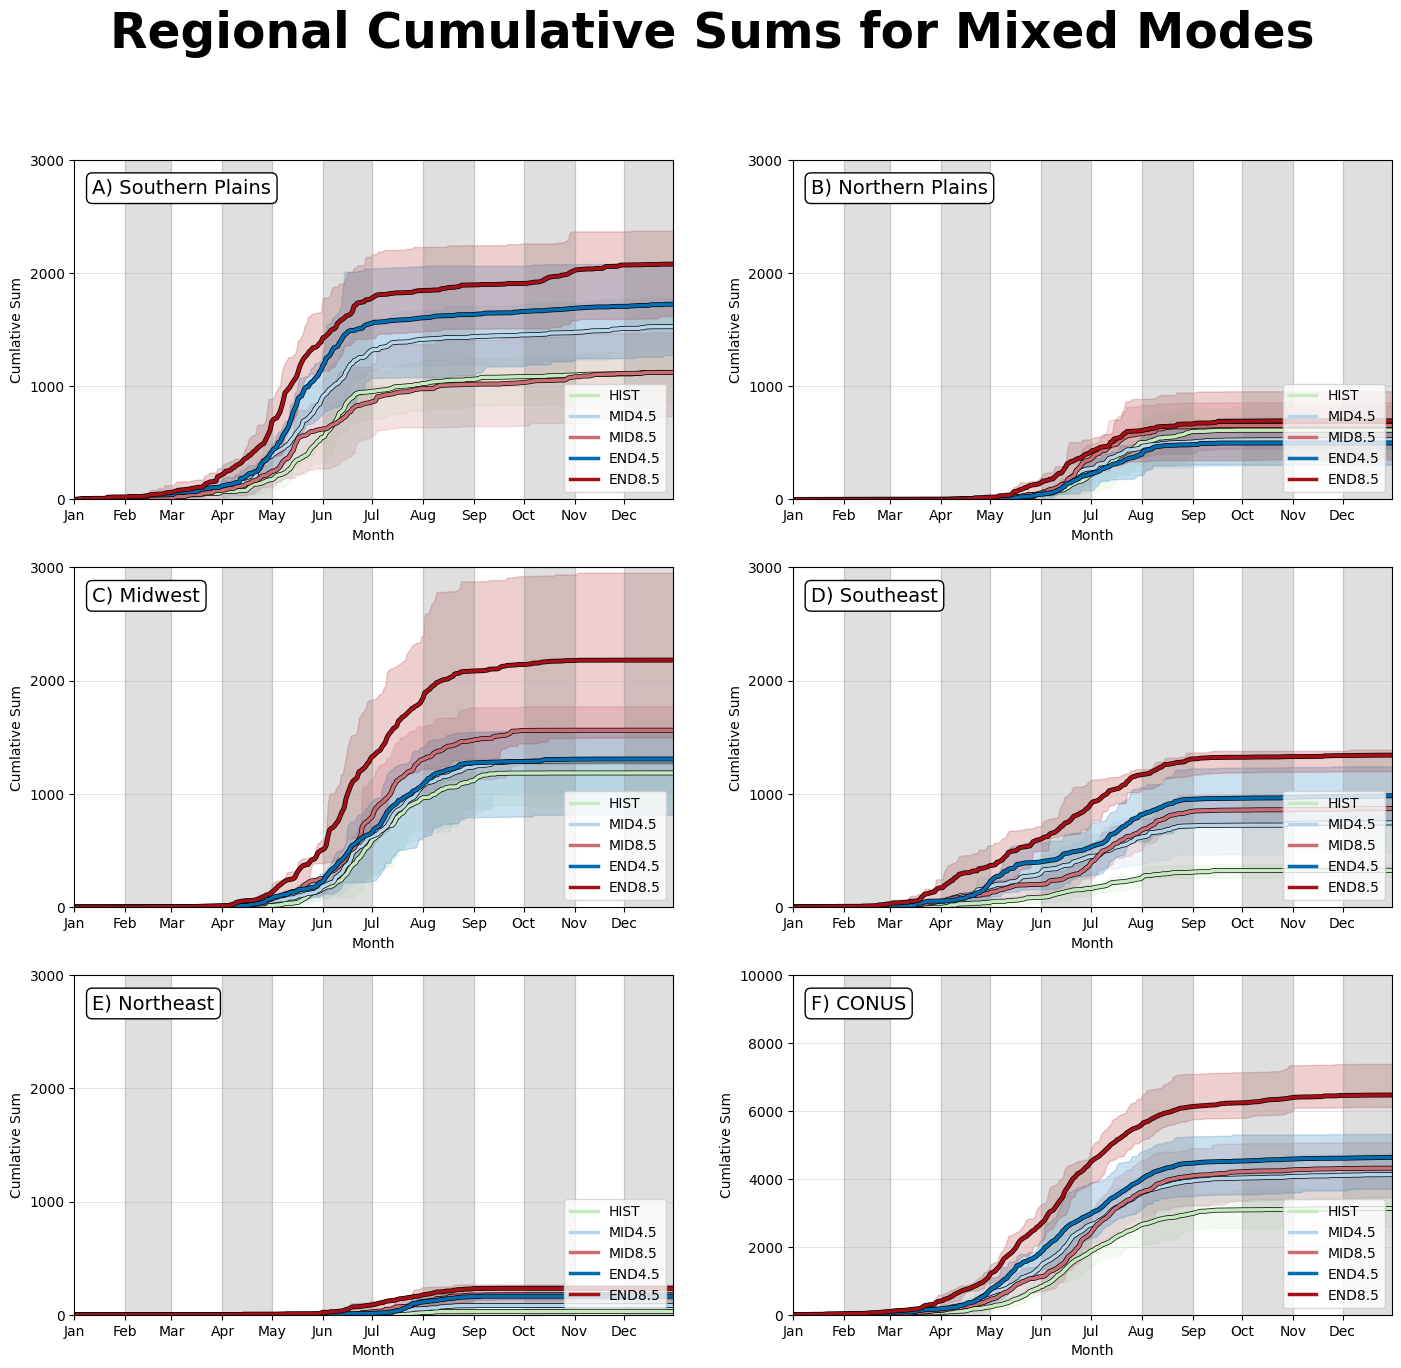

In [273]:
j = 1
fig = plt.figure(figsize=(17,15))
names = ['Southern Plains','Northern Plains', 'Midwest','Southeast','Northeast', 'CONUS']
plt.suptitle('Regional Cumulative Sums for Mixed Modes', size=35).set_weight('bold')

for key, value in regions.items():    

    #figure specifications and plotting
    fig = plt.subplot(3, 2, j)

    #ax.set_title('Cumulative HCW Counts')
    plt.xlabel('Month')
    plt.ylabel('Cumlative Sum')
    plt.grid(lw = 0.5, alpha = 0.5, zorder = 0.1)

    colors = ['#c5eabc', '#b5d6ea', '#ca6e74', '#006db3', '#a51017']
    i=0

    for epoch in epochs:
        plt.plot(np.arange(1, 366, 1), np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Multicell'].mean(axis = 1)), c = 'black', lw = 3.5)
        plt.plot(np.arange(1, 366, 1), np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Multicell'].mean(axis = 1)), c = colors[i], label = epoch_labels[i], lw = 2.5)
        
        q75 = np.quantile(np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Multicell']), 0.75, axis=1)
        q25 = np.quantile(np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Multicell']), 0.25, axis=1)
        plt.fill_between(np.arange(1, 366, 1), y1 = q25, y2 = q75, color = colors[i], alpha=0.2)
        
        i = i+1


    plt.axvspan(31, 59, color='grey', alpha=0.25)
    plt.axvspan(90, 120, color='grey', alpha=0.25)
    plt.axvspan(151, 181, color='grey', alpha=0.25)
    plt.axvspan(212, 243, color='grey', alpha=0.25)
    plt.axvspan(273, 304, color='grey', alpha=0.25)
    plt.axvspan(334, 365, color='grey', alpha=0.25)

    #setting x-axis ticks to months
    plt.xticks([0,31,59,90,120,151,181,212,243,273,304,334], labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.annotate(f'{abc[j-1]}) {names[j-1]}', (0.03,0.9),fontsize=14, 
                 bbox=dict(boxstyle='round', facecolor='w', alpha=1), xycoords='axes fraction')

    plt.legend(loc='lower right')
    
    if j == 6:
        plt.yticks(np.arange(0,10001,2000))
        plt.ylim(0,11001)
    else:
        plt.yticks(np.arange(0,3001,1000))
        plt.ylim(0,3201)

    plt.xlim(0, 364)
    j=j+1
plt.savefig('/home/jcorner1/Future_Modes/Plots/mixed_modes_cumu_sum.png', format='png', dpi=500, bbox_inches='tight')

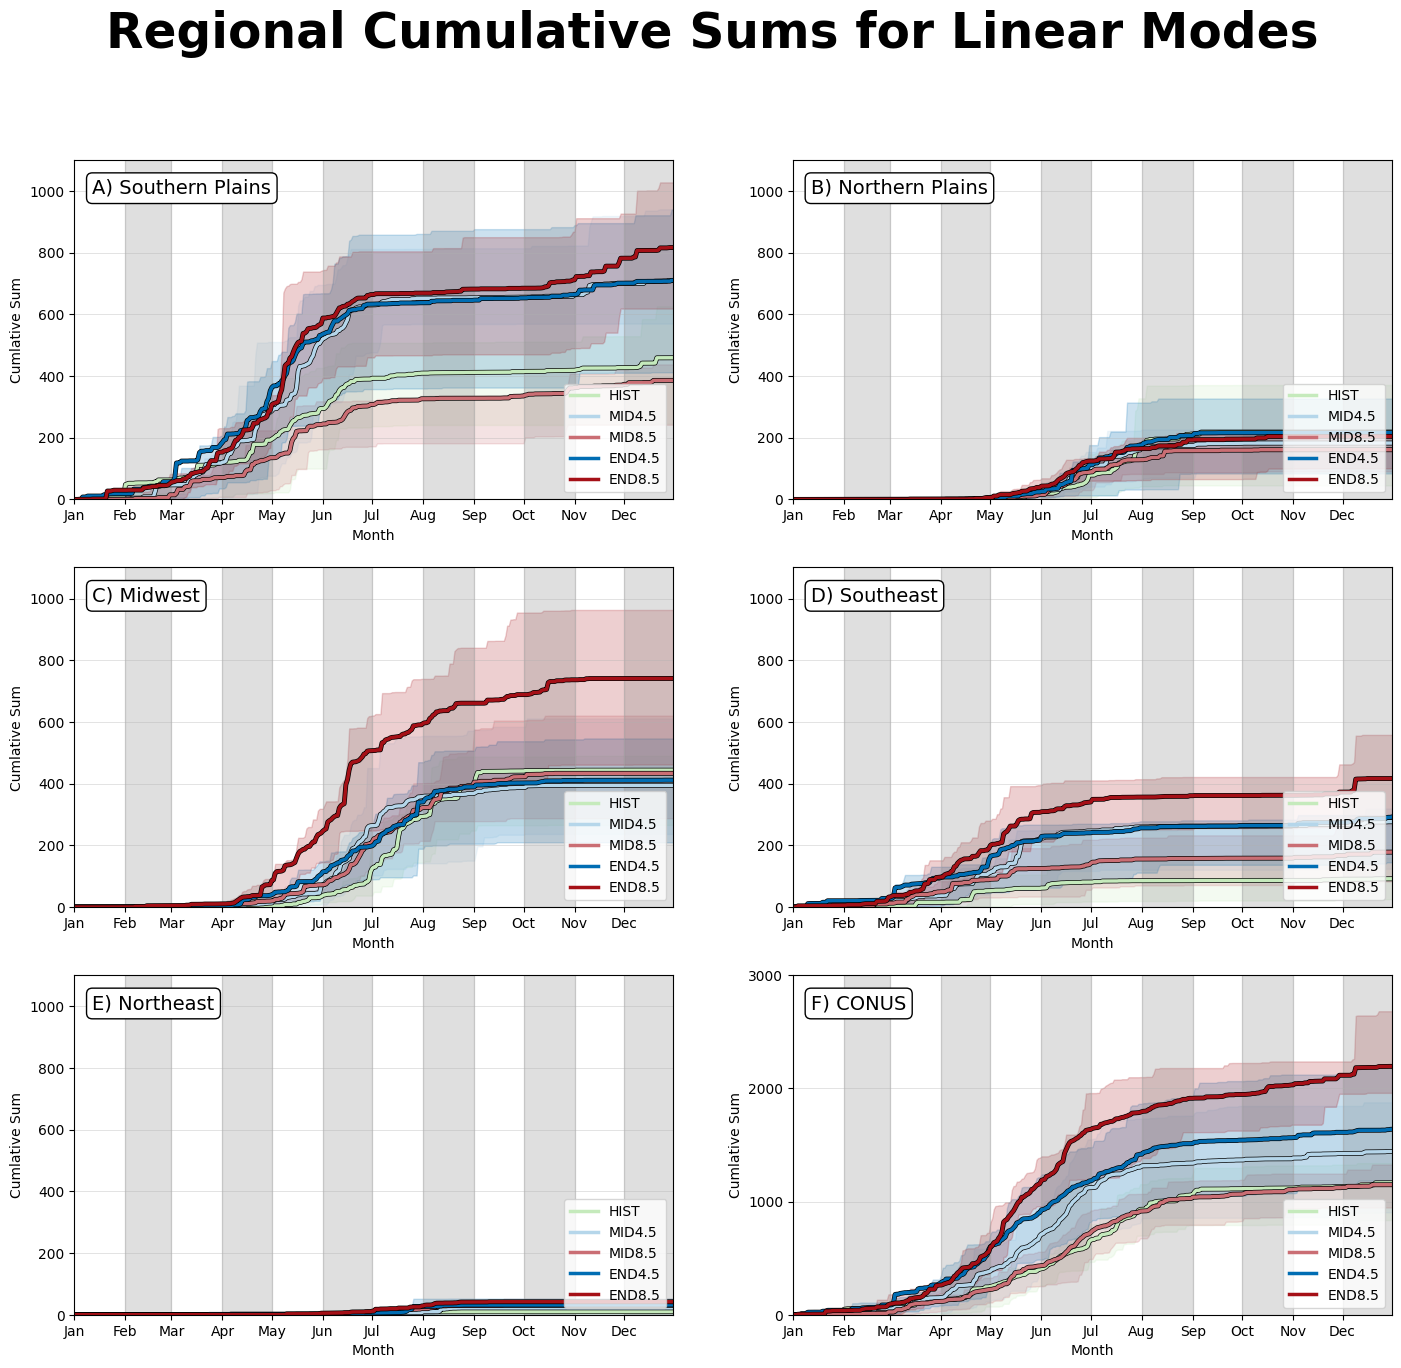

In [276]:
j = 1
fig = plt.figure(figsize=(17,15))
names = ['Southern Plains','Northern Plains', 'Midwest','Southeast','Northeast', 'CONUS']
plt.suptitle('Regional Cumulative Sums for Linear Modes', size=35).set_weight('bold')

for key, value in regions.items():    

    #figure specifications and plotting
    fig = plt.subplot(3, 2, j)

    #ax.set_title('Cumulative HCW Counts')
    plt.xlabel('Month')
    plt.ylabel('Cumlative Sum')
    plt.grid(lw = 0.5, alpha = 0.5, zorder = 0.1)

    colors = ['#c5eabc', '#b5d6ea', '#ca6e74', '#006db3', '#a51017']
    i=0

    for epoch in epochs:
        plt.plot(np.arange(1, 366, 1), np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Linear'].mean(axis = 1)), c = 'black', lw = 3.5)
        plt.plot(np.arange(1, 366, 1), np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Linear'].mean(axis = 1)), c = colors[i], label = epoch_labels[i], lw = 2.5)
        
        q75 = np.quantile(np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Linear']), 0.75, axis=1)
        q25 = np.quantile(np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Linear']), 0.25, axis=1)
        plt.fill_between(np.arange(1, 366, 1), y1 = q25, y2 = q75, color = colors[i], alpha=0.2)
        
        i = i+1


    plt.axvspan(31, 59, color='grey', alpha=0.25)
    plt.axvspan(90, 120, color='grey', alpha=0.25)
    plt.axvspan(151, 181, color='grey', alpha=0.25)
    plt.axvspan(212, 243, color='grey', alpha=0.25)
    plt.axvspan(273, 304, color='grey', alpha=0.25)
    plt.axvspan(334, 365, color='grey', alpha=0.25)

    #setting x-axis ticks to months
    plt.xticks([0,31,59,90,120,151,181,212,243,273,304,334], labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.annotate(f'{abc[j-1]}) {names[j-1]}', (0.03,0.9),fontsize=14, 
                 bbox=dict(boxstyle='round', facecolor='w', alpha=1), xycoords='axes fraction')

    plt.legend(loc='lower right')

    plt.xlim(0, 364)

    if j == 6:
        plt.yticks(np.arange(0,3001,1000))
        plt.ylim(0,3001)
    else:
        plt.yticks(np.arange(0,1001,200))
        plt.ylim(0,1101)
    
    j=j+1
plt.savefig('/home/jcorner1/Future_Modes/Plots/linear_cumu_sum.png', format='png', dpi=500, bbox_inches='tight')

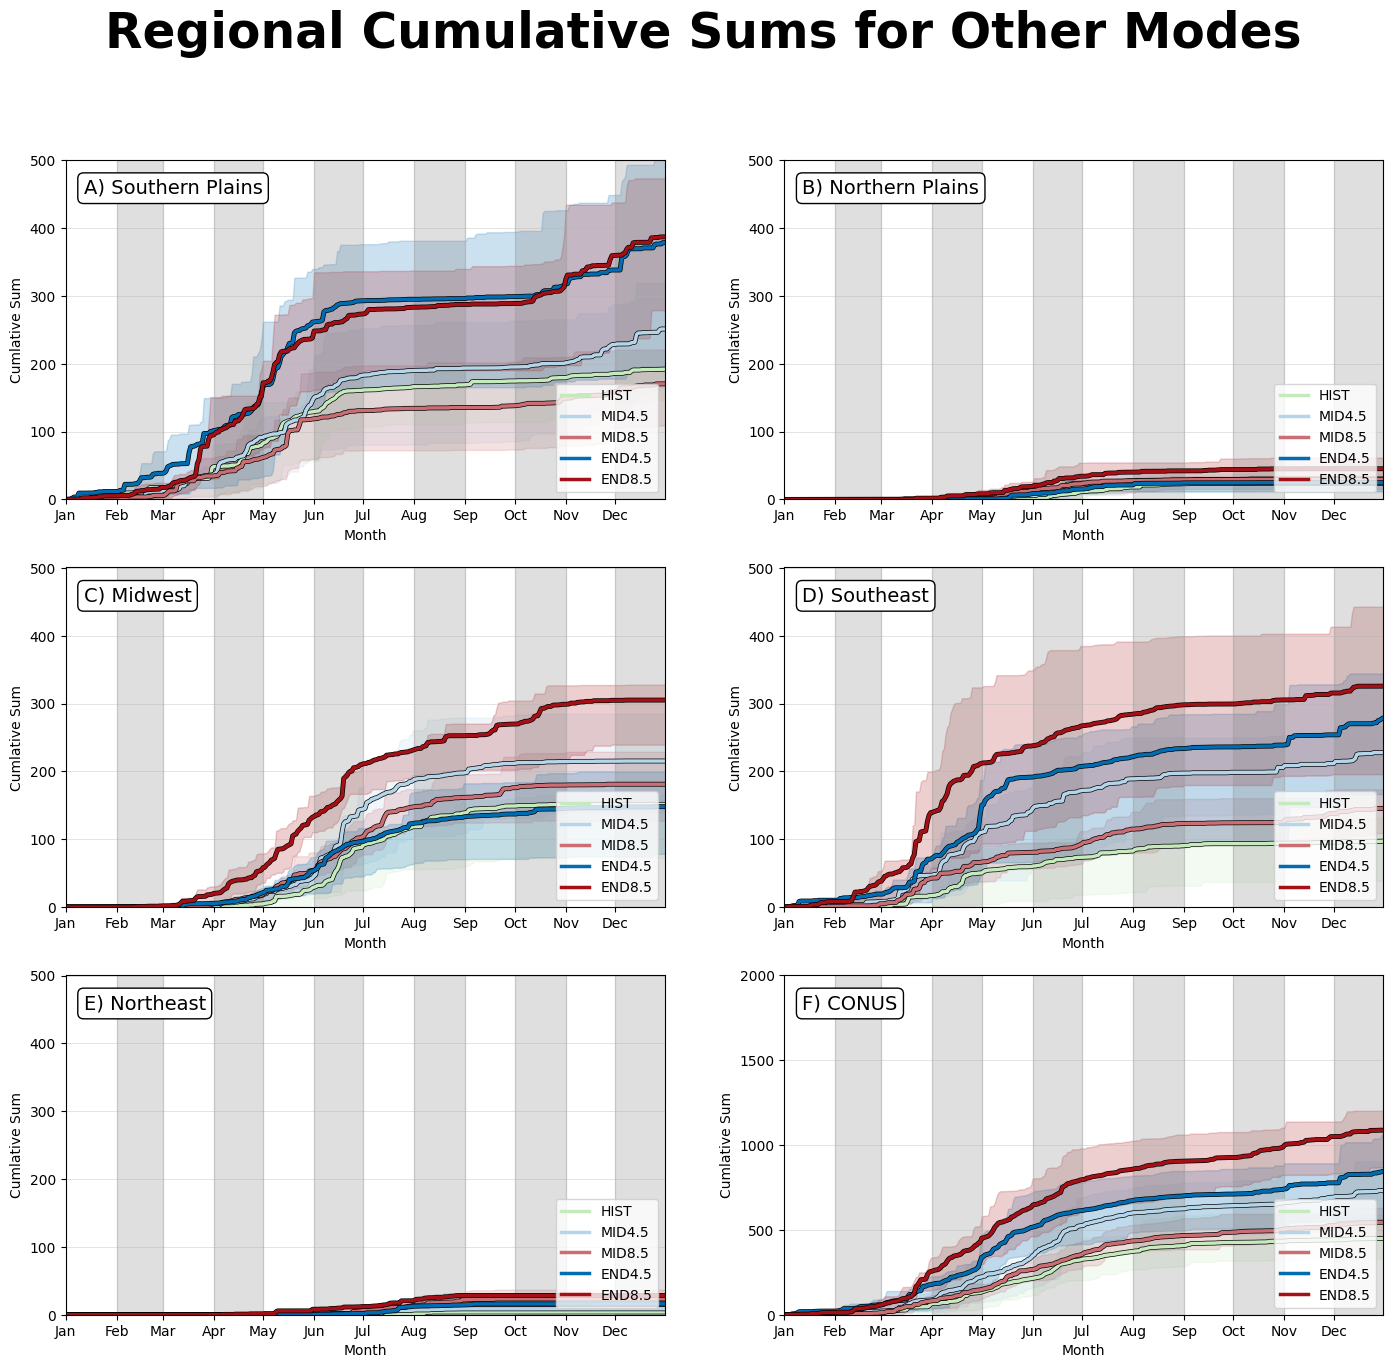

In [275]:
j = 1
fig = plt.figure(figsize=(17,15))
names = ['Southern Plains','Northern Plains', 'Midwest','Southeast','Northeast', 'CONUS']
plt.suptitle('Regional Cumulative Sums for Other Modes', size=35).set_weight('bold')

for key, value in regions.items():    

    #figure specifications and plotting
    fig = plt.subplot(3, 2, j)

    #ax.set_title('Cumulative HCW Counts')
    plt.xlabel('Month')
    plt.ylabel('Cumlative Sum')
    plt.grid(lw = 0.5, alpha = 0.5, zorder = 0.1)

    colors = ['#c5eabc', '#b5d6ea', '#ca6e74', '#006db3', '#a51017']
    i=0

    for epoch in epochs:
        plt.plot(np.arange(1, 366, 1), np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Other'].mean(axis = 1)), c = 'black', lw = 3.5)
        plt.plot(np.arange(1, 366, 1), np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Other'].mean(axis = 1)), c = colors[i], label = epoch_labels[i], lw = 2.5)
        
        q75 = np.quantile(np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Other']), 0.75, axis=1)
        q25 = np.quantile(np.cumsum(locals()[f'dailycounts_{epoch}_{key}_Other']), 0.25, axis=1)
        plt.fill_between(np.arange(1, 366, 1), y1 = q25, y2 = q75, color = colors[i], alpha=0.2)
        
        i = i+1


    plt.axvspan(31, 59, color='grey', alpha=0.25)
    plt.axvspan(90, 120, color='grey', alpha=0.25)
    plt.axvspan(151, 181, color='grey', alpha=0.25)
    plt.axvspan(212, 243, color='grey', alpha=0.25)
    plt.axvspan(273, 304, color='grey', alpha=0.25)
    plt.axvspan(334, 365, color='grey', alpha=0.25)

    #setting x-axis ticks to months
    plt.xticks([0,31,59,90,120,151,181,212,243,273,304,334], labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.annotate(f'{abc[j-1]}) {names[j-1]}', (0.03,0.9),fontsize=14, 
                 bbox=dict(boxstyle='round', facecolor='w', alpha=1), xycoords='axes fraction')

    plt.legend(loc='lower right')

    plt.xlim(0, 364)

    if j == 6:
        plt.yticks(np.arange(0,2001,500))
        plt.ylim(0,2001)
    else:
        plt.yticks(np.arange(0,501,100))
        plt.ylim(0,501)
    
    
    j=j+1
plt.savefig('/home/jcorner1/Future_Modes/Plots/other_cumu_sum.png', format='png', dpi=500, bbox_inches='tight')

## Regional Monthly Counts

In [12]:
#iterate through the epochs
for epoch in epochs:
    print(epoch)
    
    #iterate through the regions
    for key, value in regions.items():
        
        #iterate through the modes
        for mode in locals()[f'df_{epoch}'].Mode.unique():
            
            #subset the dataframe
            sub_df = locals()[f'df_{epoch}'][(locals()[f'df_{epoch}']['STUSPS'].isin(value))].copy()
            sub_df = sub_df[(sub_df['Mode'] == mode)].copy()
            
            for month in np.arange(1,13,1):
                locals()[f'{epoch}_{key}_{mode}_{month}_array'] = sub_df[(sub_df['Month']==month)].groupby(['Year'])['Day'].count().values

HIST
MID4p5
MID8p5
END4p5
END8p5


## Regional Seasonal Counts

In [13]:
seasons = {'DJF': [12, 1, 2],
           'MAM': [3, 4, 5],
           'JJA': [6, 7, 8],
           'SON': [9, 10, 11]
           }

In [14]:
#iterate through the epochs
for epoch in epochs:
    print(epoch)
    
    #iterate through the regions
    for key, value in regions.items():
        
        #iterate through the modes
        for mode in locals()[f'df_{epoch}'].Mode.unique():
            
            #subset the dataframe
            sub_df = locals()[f'df_{epoch}'][(locals()[f'df_{epoch}']['STUSPS'].isin(value))].copy()
            sub_df = sub_df[(sub_df['Mode'] == mode)].copy()
            
            for name, months in seasons.items():
                locals()[f'{epoch}_{key}_{mode}_{name}_array'] = sub_df[(sub_df['Month'].isin(months))].groupby(['Year'])['Day'].count().values

HIST
MID4p5
MID8p5
END4p5
END8p5


In [155]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

#create custom boxplot
hist_patch = mpatches.Patch(color=colors[0], label='HIST')
mid4p5_patch = mpatches.Patch(color=colors[1], label='MID4.5')
mid8p5_patch = mpatches.Patch(color=colors[2], label='MID8.5')
end4p5_patch = mpatches.Patch(color=colors[3], label='END4.5')
end8p5_patch = mpatches.Patch(color=colors[4], label='END8.5')
sig = mlines.Line2D([], [], color='black', marker='s', linestyle='None', label='M-W U; $\mathit{p}$ < 0.05')

handles = [hist_patch, mid4p5_patch, mid8p5_patch, end4p5_patch, end8p5_patch,sig]

In [200]:
regions = {'EC': [],
           'SP': ['TX', 'OK', 'KS'],
           'NP': ['NE', 'SD', 'ND'],
           'MW': ['WI', 'MI', 'OH', 'IL', 'IN', 'MN', 'IA', 'MO', 'KY'],
           'SE': ['AR', 'LA', 'TN', 'MS', 'AL', 'SC', 'NC', 'FL', 'GA'],
           'NE': ['NJ', 'PA', 'NY', 'VT', 'NH', 'CT', 'VA', 'WV', 'MD', 'DC', 'DE', 'RI', 'MA', 'ME']}

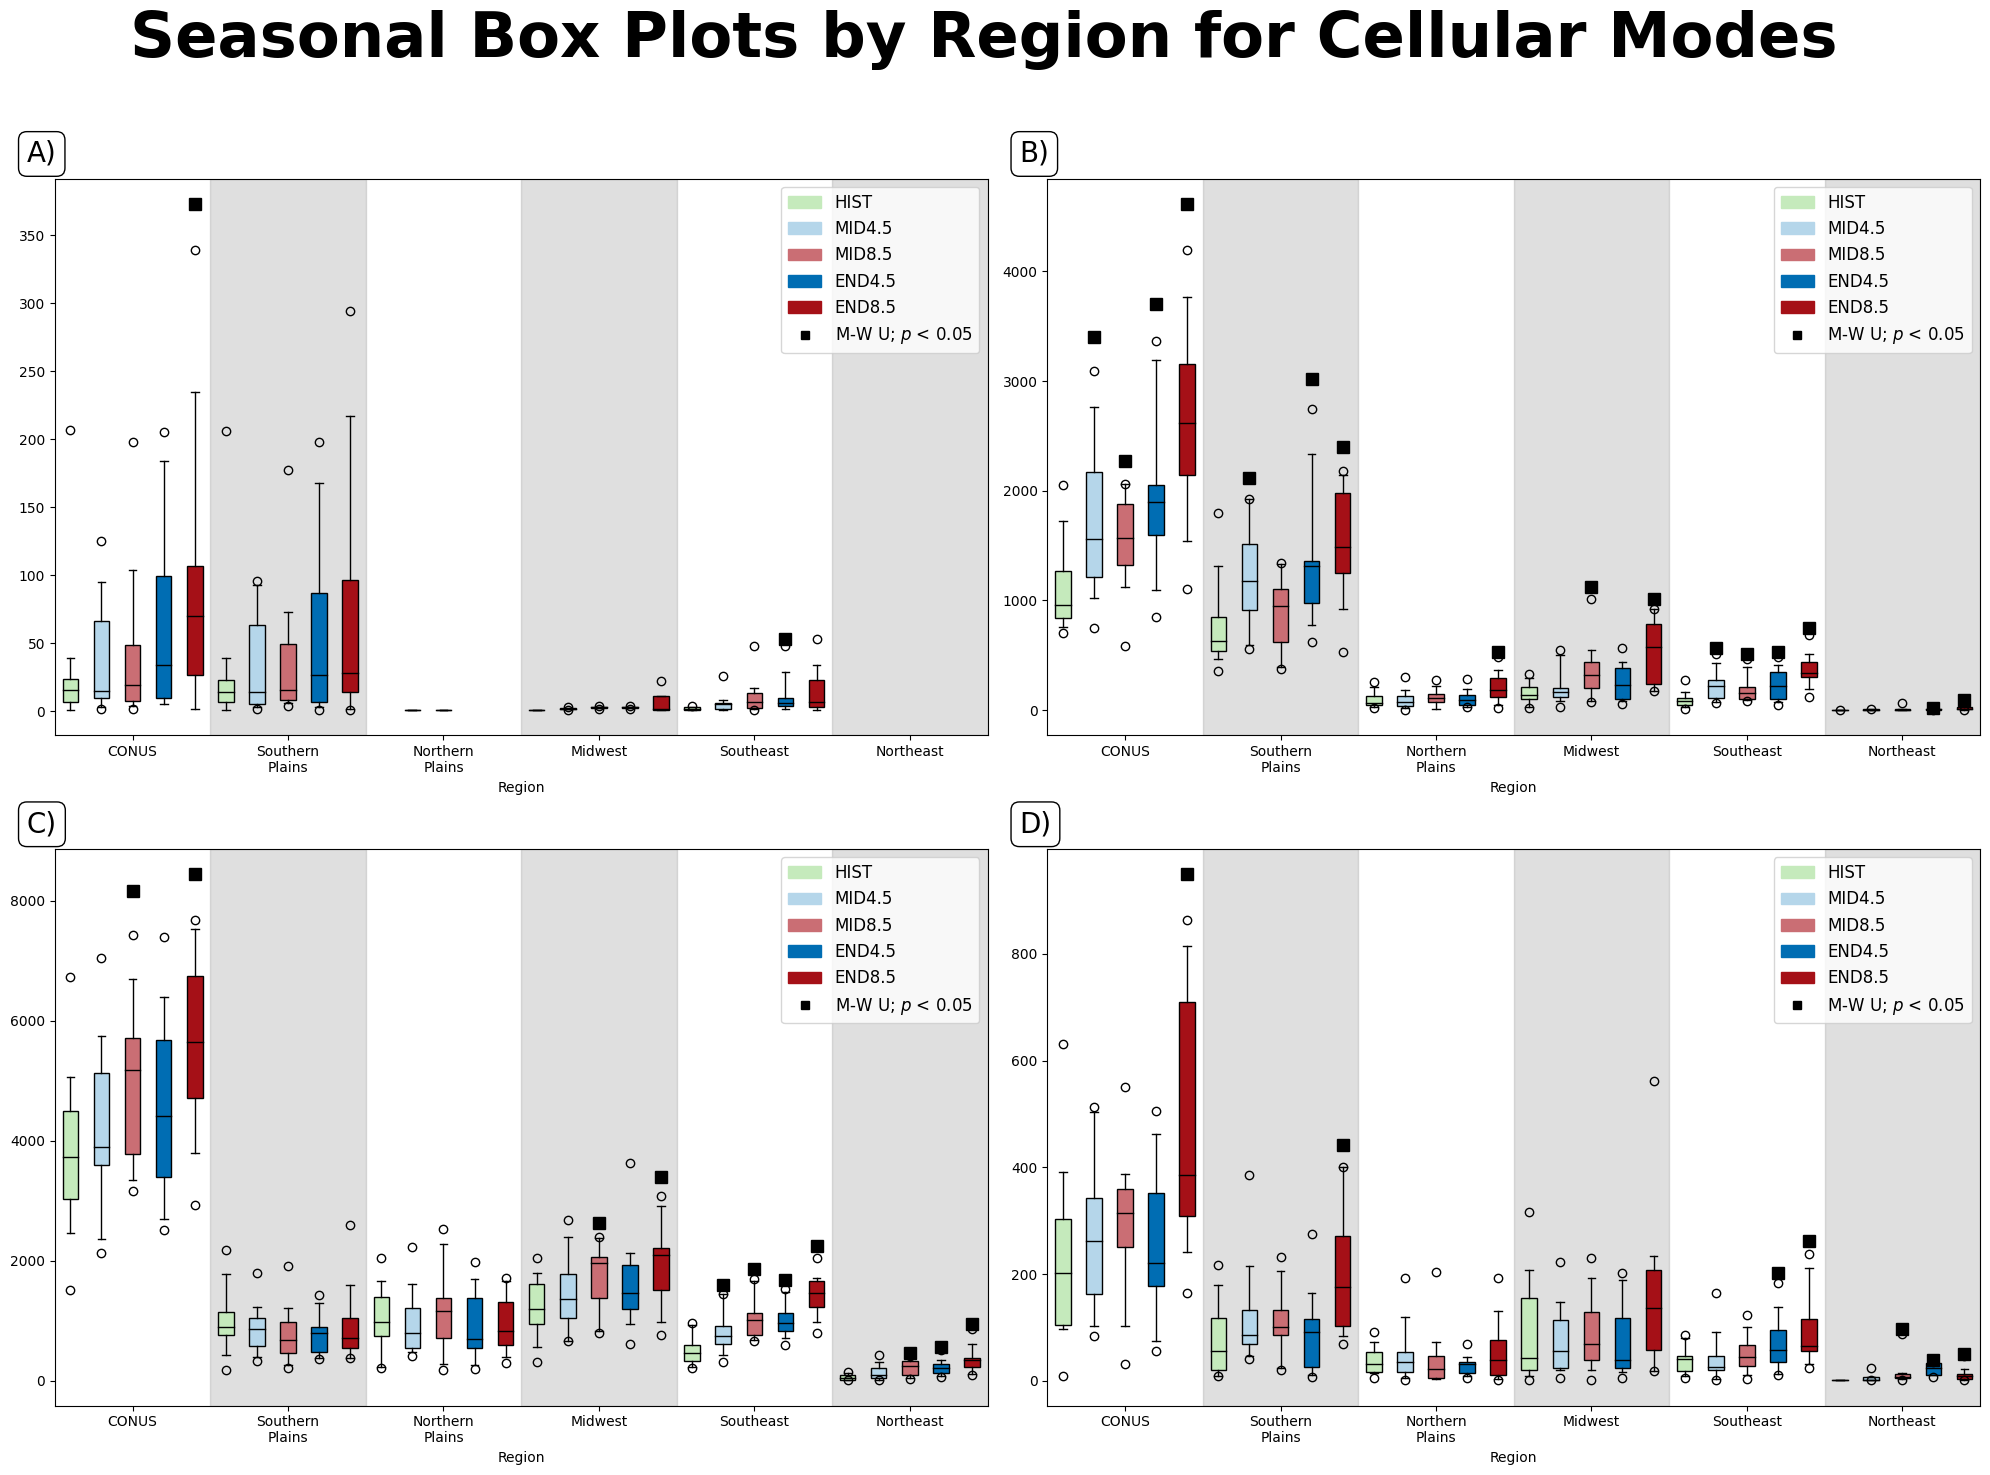

In [259]:
mode = 'Cellular'
names = ['CONUS', 'Southern\nPlains','Northern\nPlains', 'Midwest','Southeast','Northeast']
pos = [-0.4, -0.2, 0, 0.2, 0.4]
j=1


fig = plt.figure(figsize=(20,15))
plt.suptitle('Seasonal Box Plots by Region for Cellular Modes \n ', size=45).set_weight('bold')


for name, months in seasons.items():
    i = 0

    for key, value in regions.items():

        ax = plt.subplot(2, 2, j)
        bplot = ax.boxplot([locals()[f'HIST_{key}_{mode}_{name}_array'], locals()[f'MID4p5_{key}_{mode}_{name}_array'], locals()[f'MID8p5_{key}_{mode}_{name}_array'],
                           locals()[f'END4p5_{key}_{mode}_{name}_array'], locals()[f'END8p5_{key}_{mode}_{name}_array']],
                          positions=[i-0.4, i-0.2, i, i+0.2, i+0.4], whis=[5, 95], widths = 0.1, patch_artist=True)
        
        for epoch in epochs[1:]:
            if (len(locals()[f'HIST_{key}_{mode}_{name}_array']) > 0) and (len(locals()[f'{epoch}_{key}_{mode}_{name}_array']) > 0):
                s, p = mannwhitneyu(locals()[f'HIST_{key}_{mode}_{name}_array'], locals()[f'{epoch}_{key}_{mode}_{name}_array'])
                if p < 0.05:
                    ax.plot(i + pos[np.where(epoch == np.array(epochs))[0][0]], 1.1*np.max(locals()[f'{epoch}_{key}_{mode}_{name}_array']),"ks", ms=8)
        
        
        #ax.legend(bplot['boxes'],loc='upper right')
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)

        plt.setp(bplot['medians'], color='black')
        [item.set_color('black') for item in bplot['means']] 
        i = i + 1

    plt.xticks([0,1,2,3,4,5], names)
    plt.xlabel('Region')
    plt.axvspan(0.5, 1.5, color='grey', alpha=0.25)
    plt.axvspan(2.5, 3.5, color='grey', alpha=0.25)
    plt.axvspan(4.5, 5.5, color='grey', alpha=0.25)
    plt.tight_layout()
    plt.xlim(-0.5,5.5)
    plt.annotate(f'{abc[j-1]})', (-0.03,1.03),fontsize=20, 
                 bbox=dict(boxstyle='round', facecolor='w', alpha=1), xycoords='axes fraction')
    ax.legend(handles=handles, loc='upper right',fontsize=12)
    j=j+1

plt.savefig('/home/jcorner1/Future_Modes/Plots/cellular_box_plots.png', format='png', dpi=500, bbox_inches='tight')

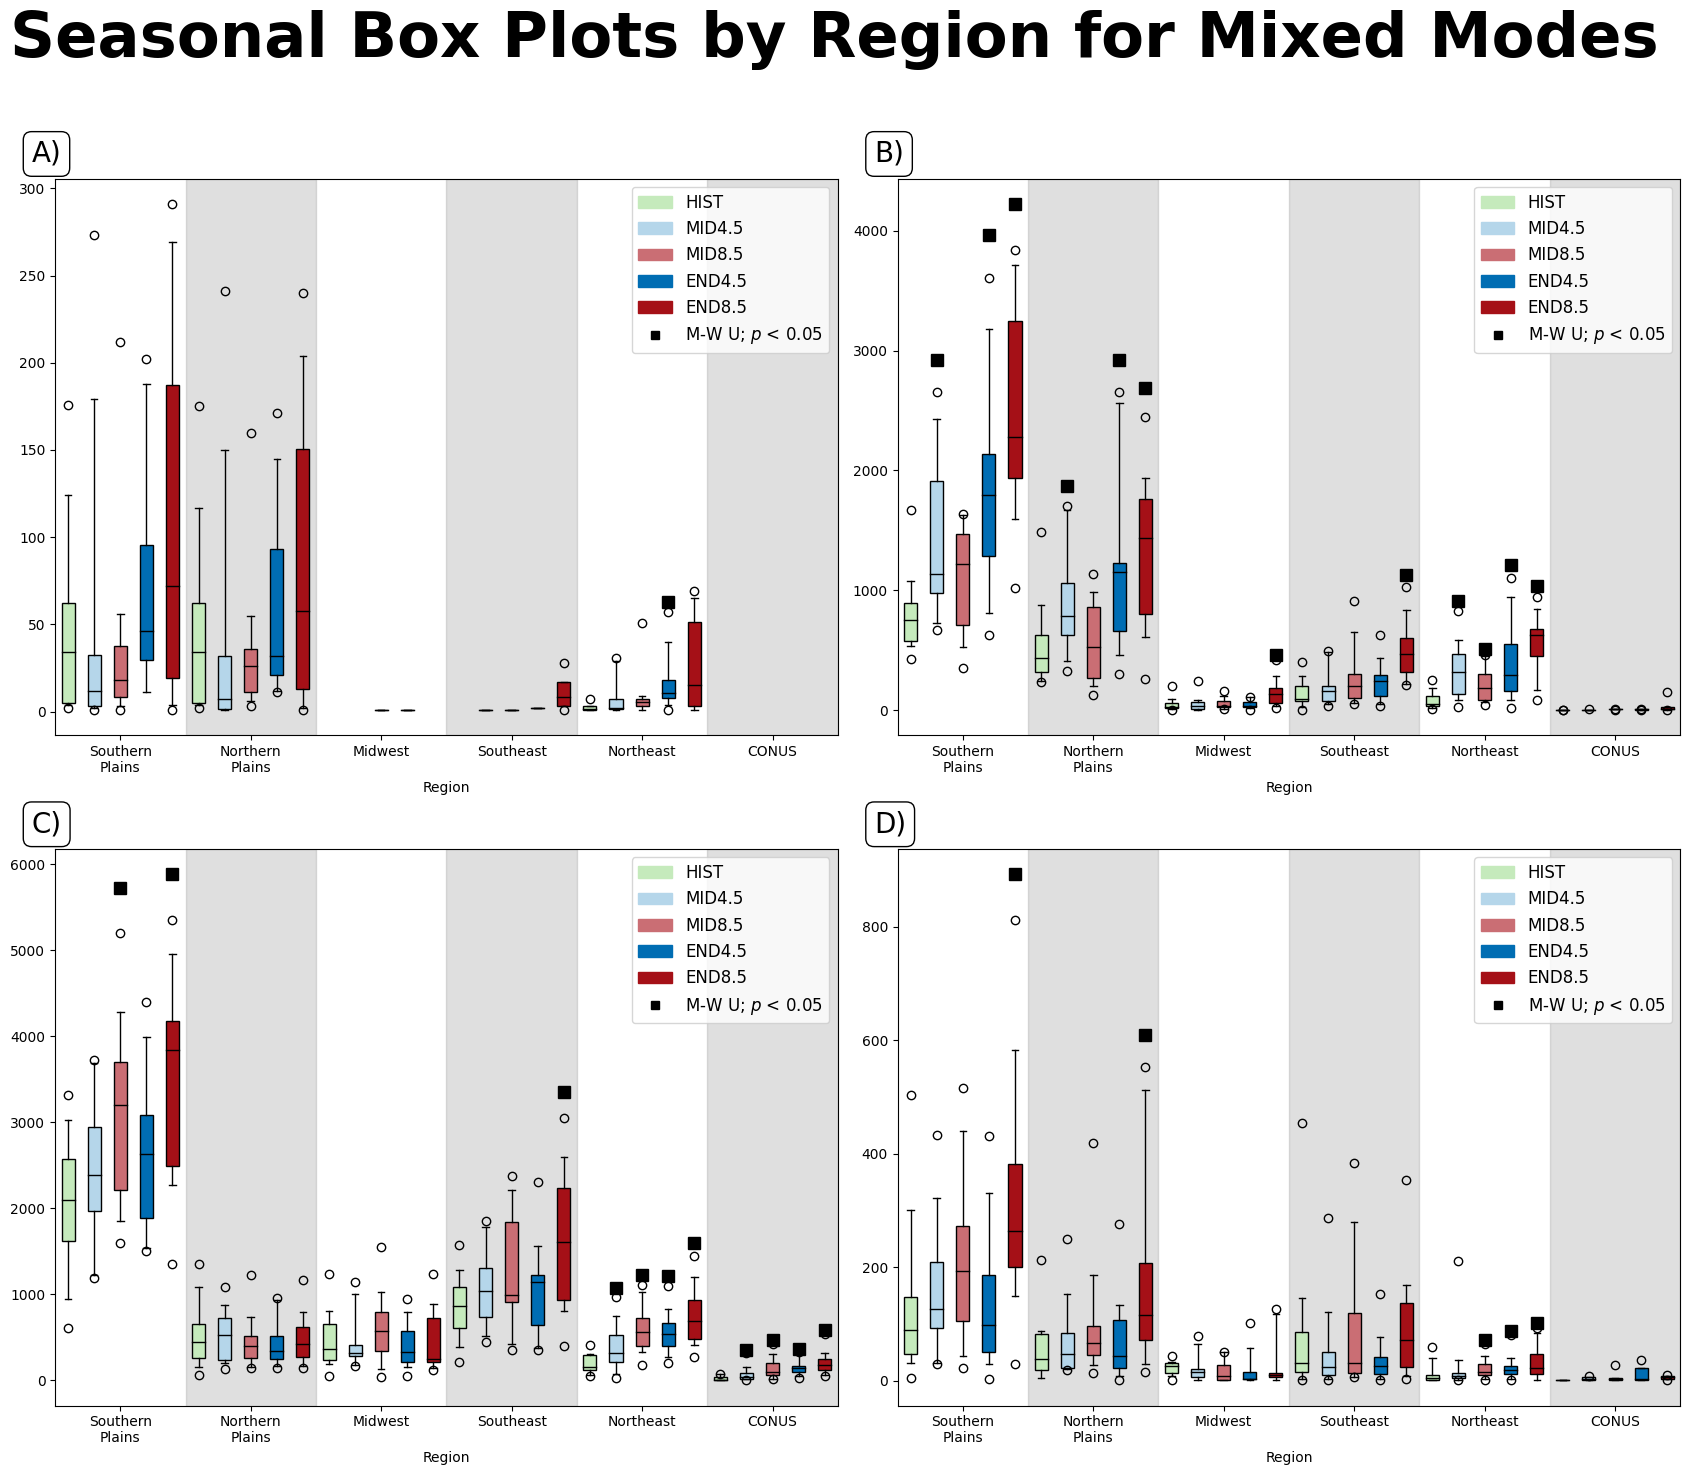

In [258]:
mode = 'Multicell'
names = ['Southern\nPlains','Northern\nPlains', 'Midwest','Southeast','Northeast', 'CONUS']
j=1

fig = plt.figure(figsize=(17,15))
plt.suptitle('Seasonal Box Plots by Region for Mixed Modes \n ', size=45).set_weight('bold')

for name, months in seasons.items():
    i = 0

    for key, value in regions.items():

        ax = plt.subplot(2, 2, j)
        bplot = ax.boxplot([locals()[f'HIST_{key}_{mode}_{name}_array'], locals()[f'MID4p5_{key}_{mode}_{name}_array'], locals()[f'MID8p5_{key}_{mode}_{name}_array'],
                           locals()[f'END4p5_{key}_{mode}_{name}_array'], locals()[f'END8p5_{key}_{mode}_{name}_array']],
                          positions=[i-0.4, i-0.2, i, i+0.2, i+0.4], whis=[5, 95], widths = 0.1, patch_artist=True)
        
        for epoch in epochs[1:]:
            if (len(locals()[f'HIST_{key}_{mode}_{name}_array']) > 0) and (len(locals()[f'{epoch}_{key}_{mode}_{name}_array']) > 0):
                s, p = mannwhitneyu(locals()[f'HIST_{key}_{mode}_{name}_array'], locals()[f'{epoch}_{key}_{mode}_{name}_array'])
                if p < 0.05:
                    ax.plot(i + pos[np.where(epoch == np.array(epochs))[0][0]], 1.1*np.max(locals()[f'{epoch}_{key}_{mode}_{name}_array']),"ks", ms=8)
        
        
        #ax.legend(bplot['boxes'],loc='upper right')
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)

        plt.setp(bplot['medians'], color='black')
        [item.set_color('black') for item in bplot['means']] 
        i = i + 1

    plt.xticks([0,1,2,3,4,5], names)
    plt.xlabel('Region')
    plt.axvspan(0.5, 1.5, color='grey', alpha=0.25)
    plt.axvspan(2.5, 3.5, color='grey', alpha=0.25)
    plt.axvspan(4.5, 5.5, color='grey', alpha=0.25)
    plt.tight_layout()
    plt.xlim(-0.5,5.5)
    plt.annotate(f'{abc[j-1]})', (-0.03,1.03),fontsize=20, 
                 bbox=dict(boxstyle='round', facecolor='w', alpha=1), xycoords='axes fraction')
    ax.legend(handles=handles, loc='upper right',fontsize=12)
    j=j+1
    
plt.savefig('/home/jcorner1/Future_Modes/Plots/mixed_mode_box_plots.png', format='png', dpi=500, bbox_inches='tight')

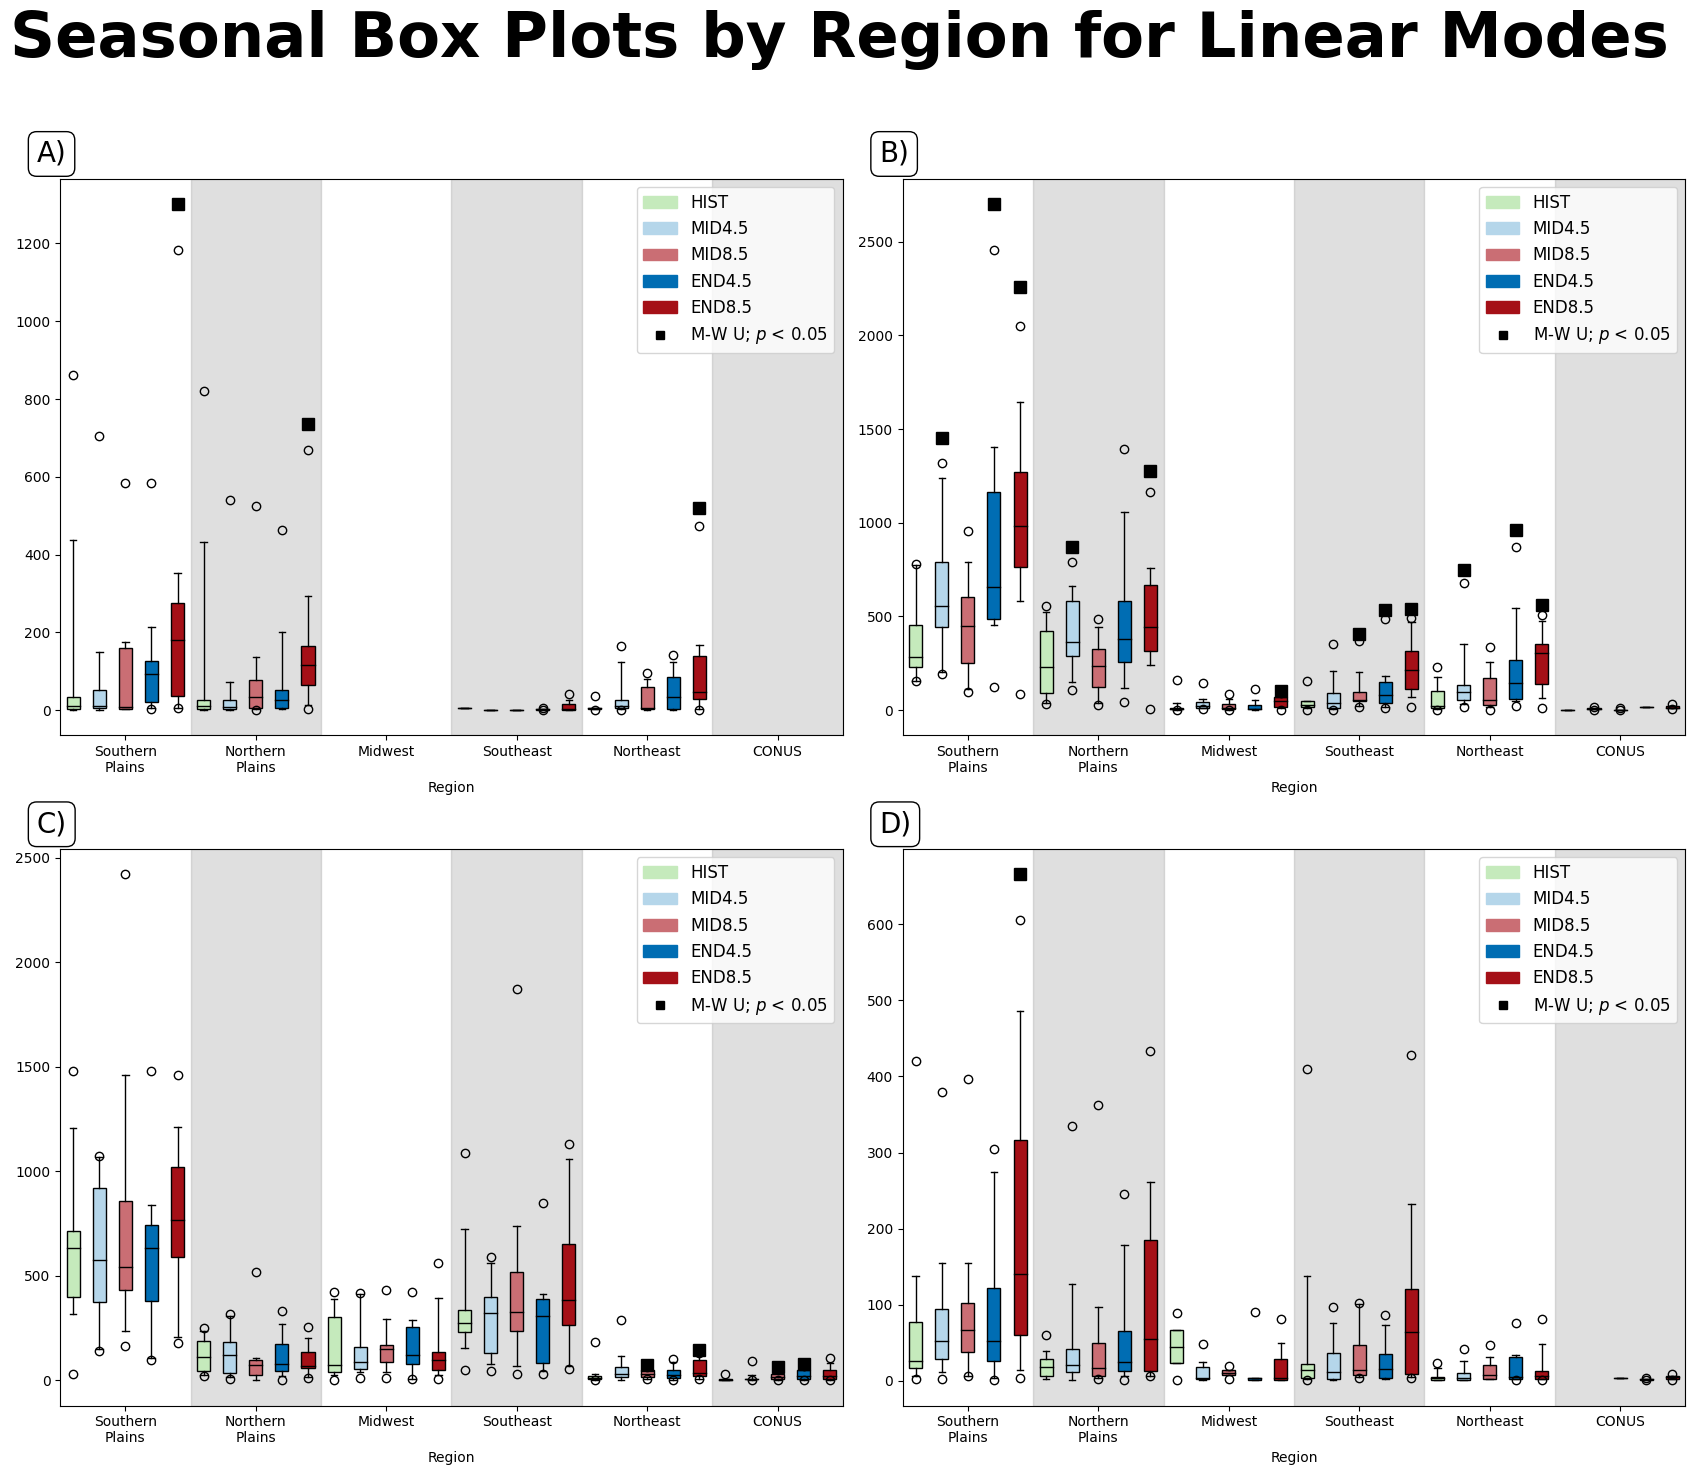

In [257]:
mode = 'Linear'
names = ['Southern\nPlains','Northern\nPlains', 'Midwest','Southeast','Northeast', 'CONUS']
j=1

fig = plt.figure(figsize=(17,15))
plt.suptitle('Seasonal Box Plots by Region for Linear Modes \n ', size=45).set_weight('bold')

for name, months in seasons.items():
    i = 0

    for key, value in regions.items():

        ax = plt.subplot(2, 2, j)
        bplot = ax.boxplot([locals()[f'HIST_{key}_{mode}_{name}_array'], locals()[f'MID4p5_{key}_{mode}_{name}_array'], locals()[f'MID8p5_{key}_{mode}_{name}_array'],
                           locals()[f'END4p5_{key}_{mode}_{name}_array'], locals()[f'END8p5_{key}_{mode}_{name}_array']],
                          positions=[i-0.4, i-0.2, i, i+0.2, i+0.4], whis=[5, 95], widths = 0.1, patch_artist=True)
        
        for epoch in epochs[1:]:
            if (len(locals()[f'HIST_{key}_{mode}_{name}_array']) > 0) and (len(locals()[f'{epoch}_{key}_{mode}_{name}_array']) > 0):
                s, p = mannwhitneyu(locals()[f'HIST_{key}_{mode}_{name}_array'], locals()[f'{epoch}_{key}_{mode}_{name}_array'])
                if p < 0.05:
                    ax.plot(i + pos[np.where(epoch == np.array(epochs))[0][0]], 1.1* np.max(locals()[f'{epoch}_{key}_{mode}_{name}_array']),"ks", ms=8)
        
        
        #ax.legend(bplot['boxes'],loc='upper right')
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)

        plt.setp(bplot['medians'], color='black')
        [item.set_color('black') for item in bplot['means']] 
        i = i + 1

    plt.xticks([0,1,2,3,4,5], names)
    plt.xlabel('Region')
    plt.axvspan(0.5, 1.5, color='grey', alpha=0.25)
    plt.axvspan(2.5, 3.5, color='grey', alpha=0.25)
    plt.axvspan(4.5, 5.5, color='grey', alpha=0.25)
    plt.tight_layout()
    plt.xlim(-0.5,5.5)
    plt.annotate(f'{abc[j-1]})', (-0.03,1.03),fontsize=20, 
                 bbox=dict(boxstyle='round', facecolor='w', alpha=1), xycoords='axes fraction')
    ax.legend(handles=handles, loc='upper right',fontsize=12)
    j=j+1

plt.savefig('/home/jcorner1/Future_Modes/Plots/linear_box_plots.png', format='png', dpi=500, bbox_inches='tight')

## Diurnal Bar Graph

/tmp/ipykernel_6776/844418036.py:19: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels[::-1])


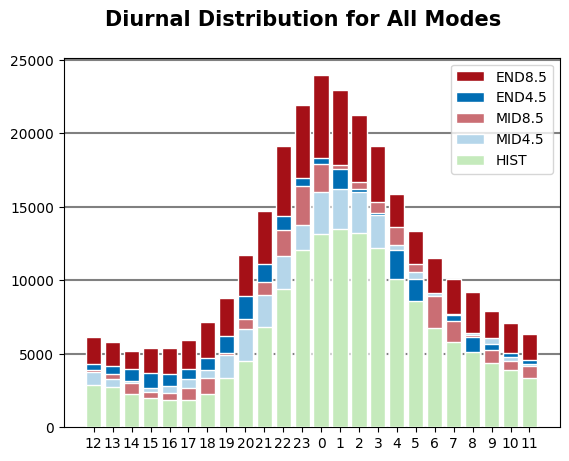

In [144]:
#All modes, regions, and seasons Diurnal Bar Graph
colors = ['#c5eabc', '#b5d6ea', '#ca6e74', '#006db3', '#a51017']

plt.suptitle('Diurnal Distribution for All Modes', size=15).set_weight('bold')

for hour in np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]):
    values = {}
    
    for epoch in epochs:
        sub_df = locals()[f'df_{epoch}']
        sub_df = sub_df[(sub_df['New_Hour'] == hour)].copy()
        values.update({f'{epoch}': len(sub_df)})
    
    for value in sorted(values, key=values.get, reverse=True):
        plt.bar(hour, values[value], color=colors[np.where(np.array(epochs) == value)[0][0]], edgecolor='white', width=0.8, zorder=10)
        

plt.xticks(np.arange(0,24,1), np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]))
plt.legend(colors, labels=epoch_labels[::-1])

plt.axhline(y = 5000, color = 'grey', ls='-')
plt.axhline(y = 10000, color = 'grey', ls='-')
plt.axhline(y = 15000, color = 'grey', ls='-')
plt.axhline(y = 20000, color = 'grey', ls='-')
plt.axhline(y = 25000, color = 'grey', ls='-')

plt.savefig('/home/jcorner1/Future_Modes/Plots/diurnal_all_storms.png', format='png', dpi=500, bbox_inches='tight')

/tmp/ipykernel_6776/48483994.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels, fontsize=25)


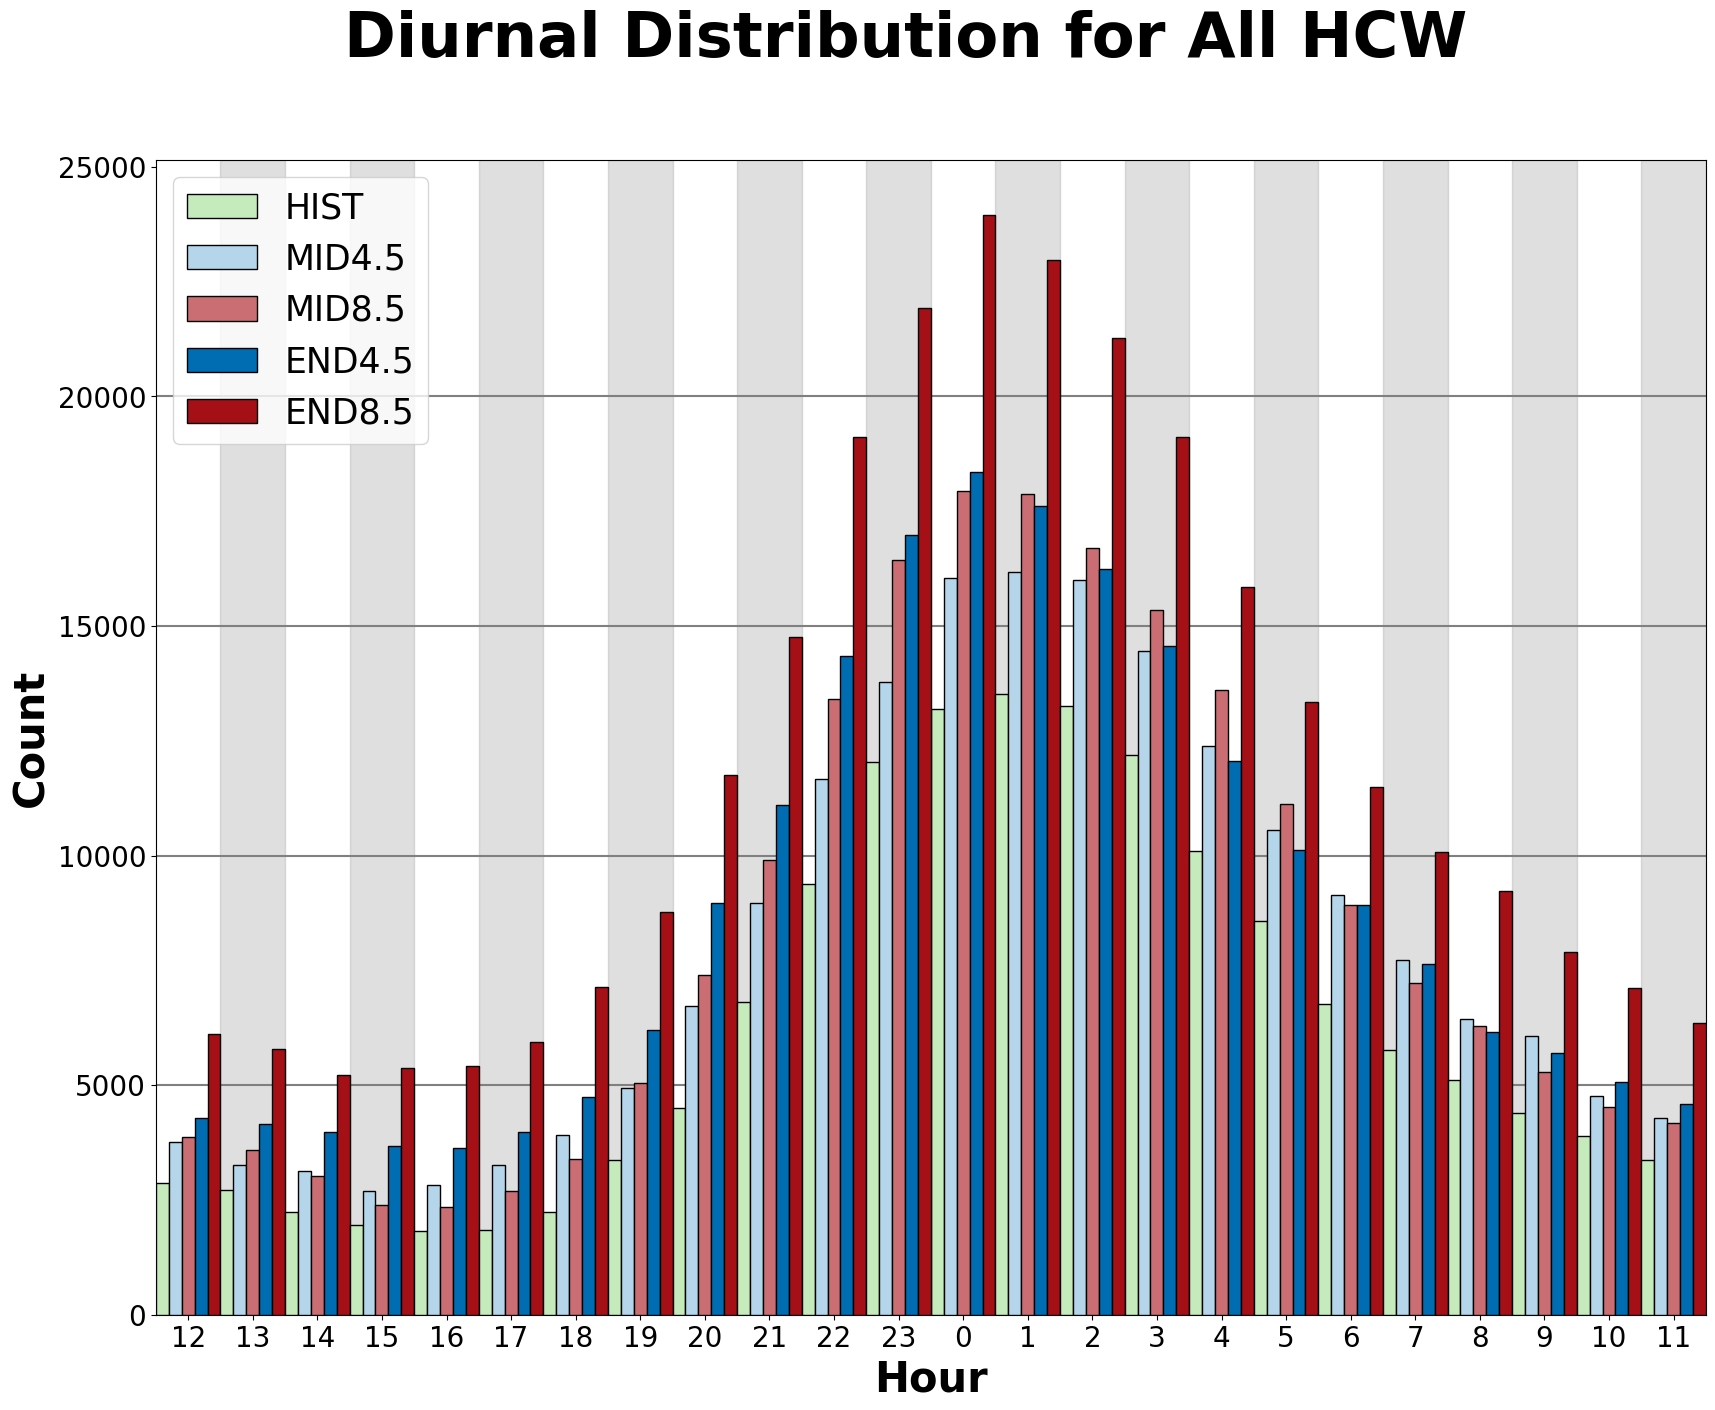

In [277]:
fig = plt.figure(figsize=(20,15))

#All modes, regions, and seasons Diurnal Bar Graph
colors = ['#c5eabc', '#b5d6ea', '#ca6e74', '#006db3', '#a51017']

plt.suptitle('Diurnal Distribution for All HCW', size=45).set_weight('bold')

for hour in np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]):
    values = {}
    
    for epoch in range(len(epochs)):
        sub_df = locals()[f'df_{epochs[epoch]}']
        sub_df = sub_df[(sub_df['New_Hour'] == hour)].copy()
        plt.bar(hour + pos[epoch], len(sub_df), color=colors[epoch], edgecolor='k', width=0.20, zorder=10)
        

plt.xticks(np.arange(0,24,1), np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]), fontsize=20)
plt.xlabel('Hour', fontsize=30).set_weight('bold')
plt.yticks(np.arange(0,25001,5000), fontsize=20)
plt.ylabel('Count', fontsize=30).set_weight('bold')
plt.xlim(-0.5, 23.5)

plt.legend(colors, labels=epoch_labels, fontsize=25)

plt.axhline(y = 5000, color = 'grey', ls='-')
plt.axhline(y = 10000, color = 'grey', ls='-')
plt.axhline(y = 15000, color = 'grey', ls='-')
plt.axhline(y = 20000, color = 'grey', ls='-')

plt.axvspan(0.5, 1.5, color='grey', alpha=0.25)
plt.axvspan(2.5, 3.5, color='grey', alpha=0.25)
plt.axvspan(4.5, 5.5, color='grey', alpha=0.25)
plt.axvspan(6.5, 7.5, color='grey', alpha=0.25)
plt.axvspan(8.5, 9.5, color='grey', alpha=0.25)
plt.axvspan(10.5, 11.5, color='grey', alpha=0.25)
plt.axvspan(12.5, 13.5, color='grey', alpha=0.25)
plt.axvspan(14.5, 15.5, color='grey', alpha=0.25)
plt.axvspan(16.5, 17.5, color='grey', alpha=0.25)
plt.axvspan(18.5, 19.5, color='grey', alpha=0.25)
plt.axvspan(20.5, 21.5, color='grey', alpha=0.25)
plt.axvspan(22.5, 23.5, color='grey', alpha=0.25)

plt.savefig('/home/jcorner1/Future_Modes/Plots/diurnal_all_storms.png', format='png', dpi=500, bbox_inches='tight')

/tmp/ipykernel_6776/3433627534.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels[::-1],fontsize=14)
/tmp/ipykernel_6776/3433627534.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels[::-1],fontsize=14)
/tmp/ipykernel_6776/3433627534.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels[::-1],fontsize=14)
/tmp/ipykernel_6776/3433627534.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels[::-1],fontsize=14)


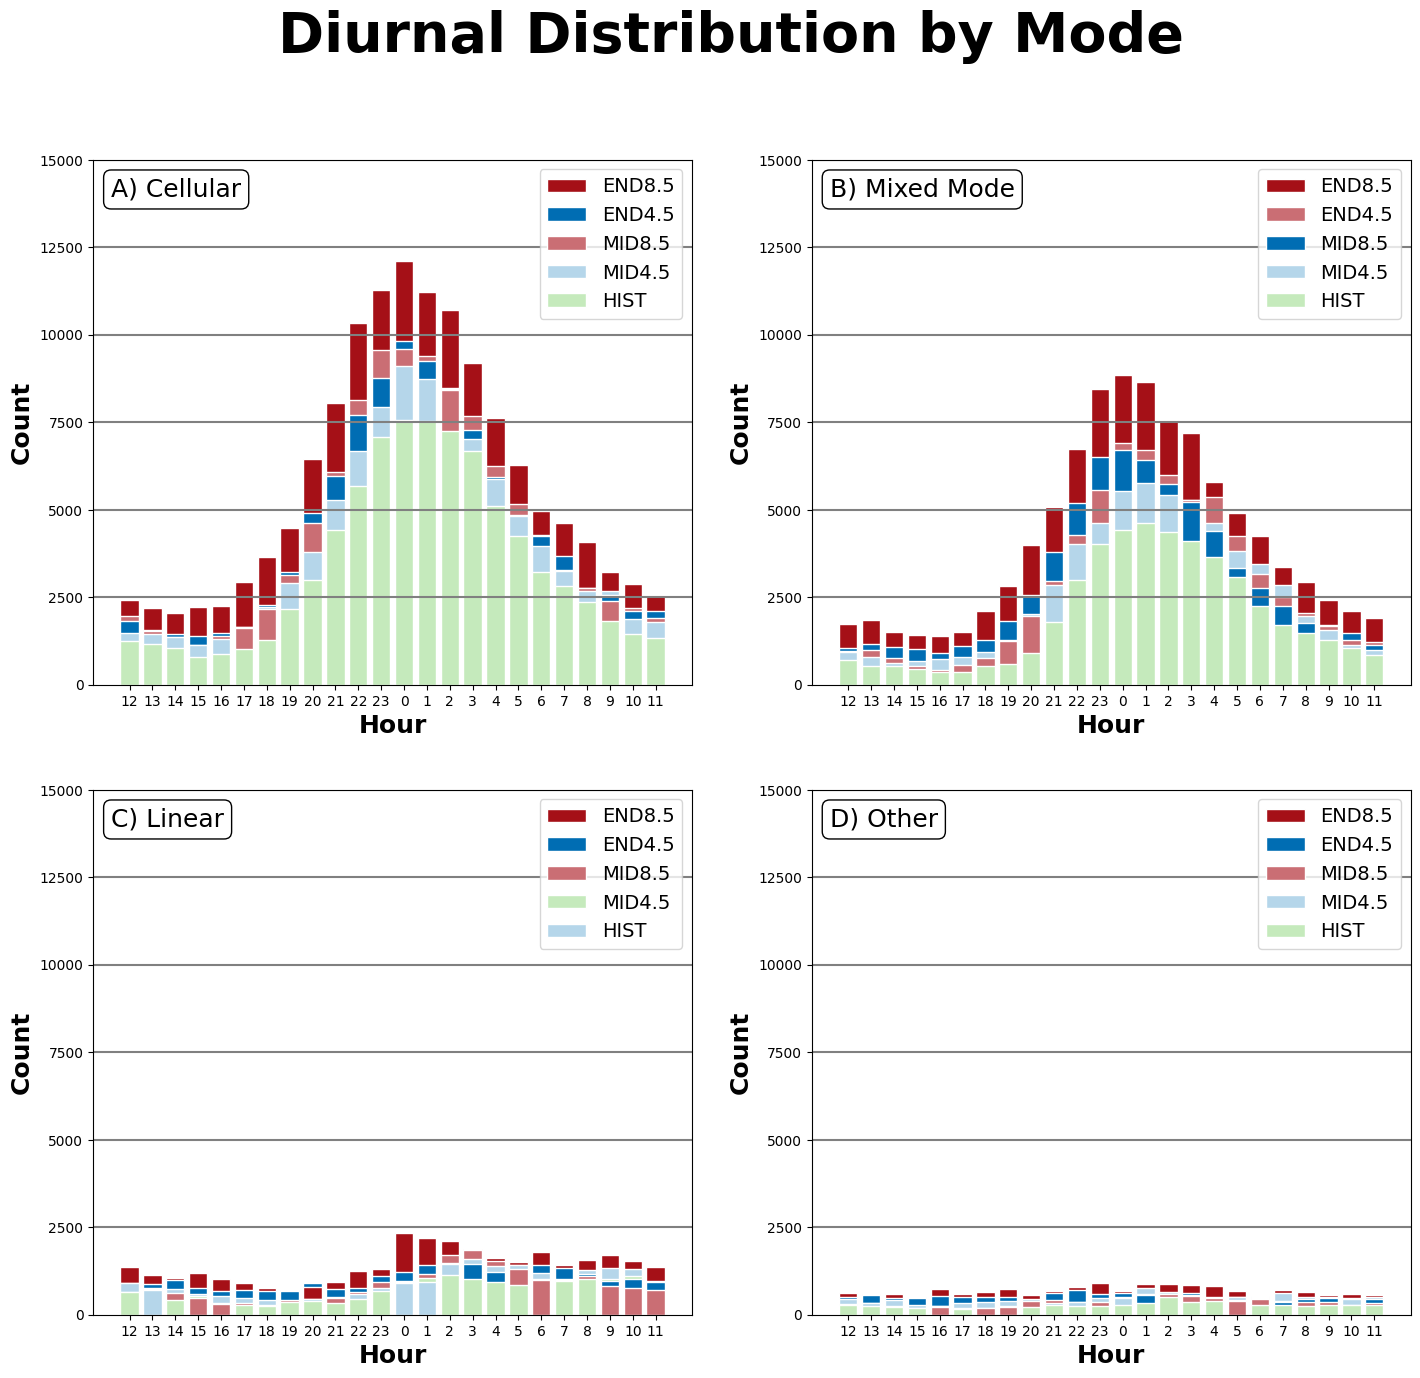

In [140]:
j = 1
fig = plt.figure(figsize=(17,15))

for mode in ['Cellular', 'Multicell', 'Linear', 'Other']:
    
    #figure specifications and plotting
    fig = plt.subplot(2, 3, j)
    for hour in np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]):
        values = {}

        for epoch in epochs:
            sub_df = locals()[f'df_{epoch}']
            sub_df = sub_df[((sub_df['New_Hour'] == hour) & (sub_df['Mode'] == mode))].copy()
            values.update({f'{epoch}': len(sub_df)})

        for value in sorted(values, key=values.get, reverse=True):
            plt.bar(hour, values[value], color=colors[np.where(np.array(epochs) == value)[0][0]], edgecolor='white', width=0.8)
            epoch_bottom = epoch_bottom + values[value]
            
    plt.xticks(np.arange(0,24,1), np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]))
    plt.legend(colors, labels=epoch_labels[::-1],fontsize=14)
    plt.suptitle('Diurnal Distribution by Mode', size=40).set_weight('bold')
    plt.annotate(f"{abc[j-1]}) {['Cellular', 'Mixed Mode', 'Linear', 'Other'][j-1]}", (0.03,0.93),fontsize=18, 
                 bbox=dict(boxstyle='round', facecolor='w', alpha=1), xycoords='axes fraction')
    
    plt.xlabel('Hour',fontsize=18).set_weight('bold')
    plt.ylabel('Count',fontsize=18).set_weight('bold')
    plt.yticks(np.arange(0,15001,2500))
    
    plt.axhline(y = 2500, color = 'grey', ls='-')
    plt.axhline(y = 5000, color = 'grey', ls='-')
    plt.axhline(y = 7500, color = 'grey', ls='-')
    plt.axhline(y = 10000, color = 'grey', ls='-')
    plt.axhline(y = 12500, color = 'grey', ls='-')
    plt.axhline(y = 15000, color = 'grey', ls='-')
    
    j = j + 1
plt.savefig('/home/jcorner1/Future_Modes/Plots/diurnal_mode.png', format='png', dpi=500, bbox_inches='tight')

In [175]:
colors2 = ['#FFABAB', '#6EB5FF', '#AFF8DB', '#B28DFF']

#create custom boxplot
mode1_patch = mpatches.Patch(color=colors2[0], label='Cellular')
mode2_patch = mpatches.Patch(color=colors2[1], label='Mixed Mode')
mode3_patch = mpatches.Patch(color=colors2[2], label='Linear')
mode4_patch = mpatches.Patch(color=colors2[3], label='Other')

handles2 = [mode1_patch, mode2_patch, mode3_patch, mode4_patch, ]

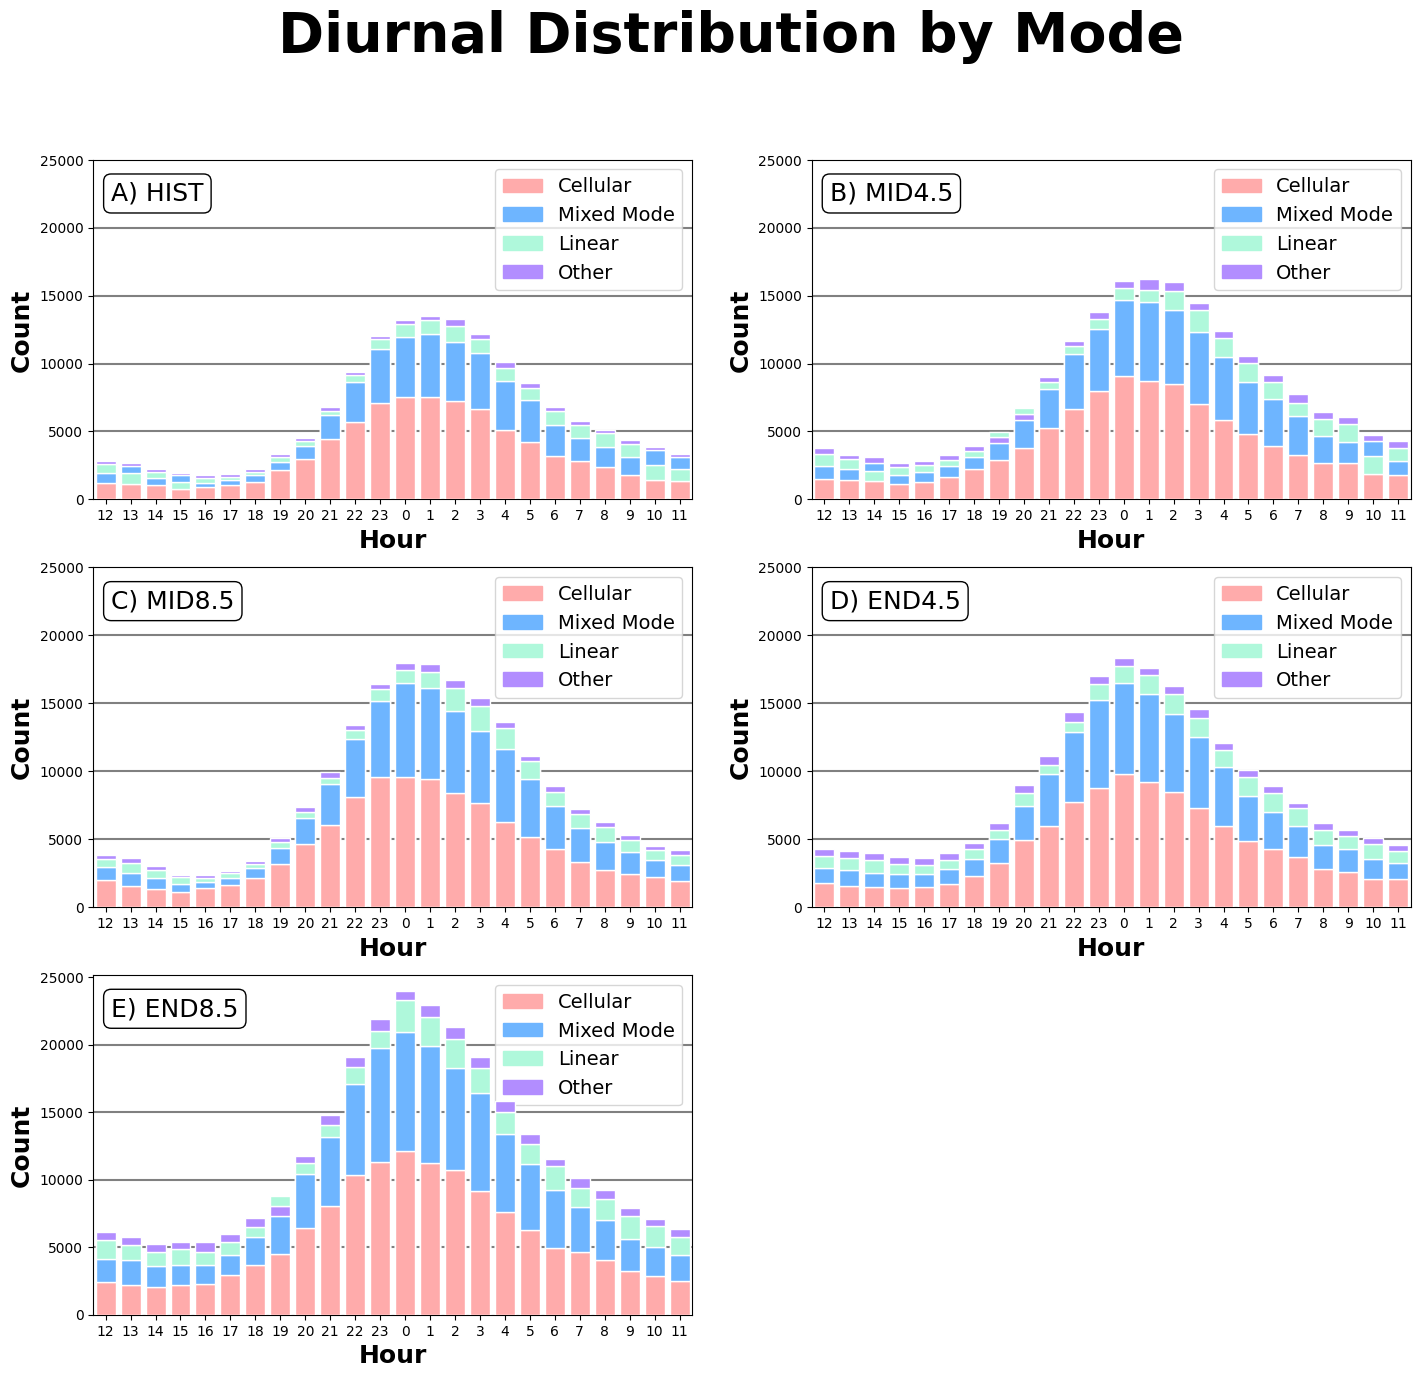

In [261]:
j = 1
fig = plt.figure(figsize=(17,15))

for epoch in epochs:
    
    #figure specifications and plotting
    fig = plt.subplot(3, 2, j)
    for hour in np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]):
        values = {}
        
        for mode in ['Cellular', 'Multicell', 'Linear', 'Other']:
            sub_df = locals()[f'df_{epoch}']
            sub_df = sub_df[((sub_df['New_Hour'] == hour) & (sub_df['Mode'] == mode))].copy()
            values.update({f'{mode}': len(sub_df)})
            epoch_bottom = 0 

            for value in sorted(values, key=values.get, reverse=True):
                plt.bar(hour, values[value], color=colors2[np.where(np.array(['Cellular', 'Multicell', 'Linear', 'Other']) == value)[0][0]],
                        edgecolor='white', width=0.8, bottom=epoch_bottom, zorder = 10)
                epoch_bottom = epoch_bottom + values[value]
                
    plt.xticks(np.arange(0,24,1), np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]))
    plt.legend(handles=handles2,fontsize=14, loc='upper right')
    plt.suptitle('Diurnal Distribution by Mode', size=40).set_weight('bold')
    plt.annotate(f"{abc[j-1]}) {epoch_labels[j-1]}", (0.03,0.88),fontsize=18, 
                 bbox=dict(boxstyle='round', facecolor='w', alpha=1), xycoords='axes fraction')
    
    plt.xlabel('Hour',fontsize=18).set_weight('bold')
    plt.ylabel('Count',fontsize=18).set_weight('bold')
    plt.yticks(np.arange(0,25001,5000))
    plt.xlim(-0.5, 23.5)
    
    plt.axhline(y = 5000, color = 'grey', ls='-')
    plt.axhline(y = 10000, color = 'grey', ls='-')
    plt.axhline(y = 15000, color = 'grey', ls='-')
    plt.axhline(y = 20000, color = 'grey', ls='-')
    j = j + 1
    
plt.savefig('/home/jcorner1/Future_Modes/Plots/diurnal_modes_epochs.png', format='png', dpi=500, bbox_inches='tight')

/tmp/ipykernel_6776/3427641725.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/3427641725.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/3427641725.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/3427641725.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/3427641725.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/3427641725.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(col

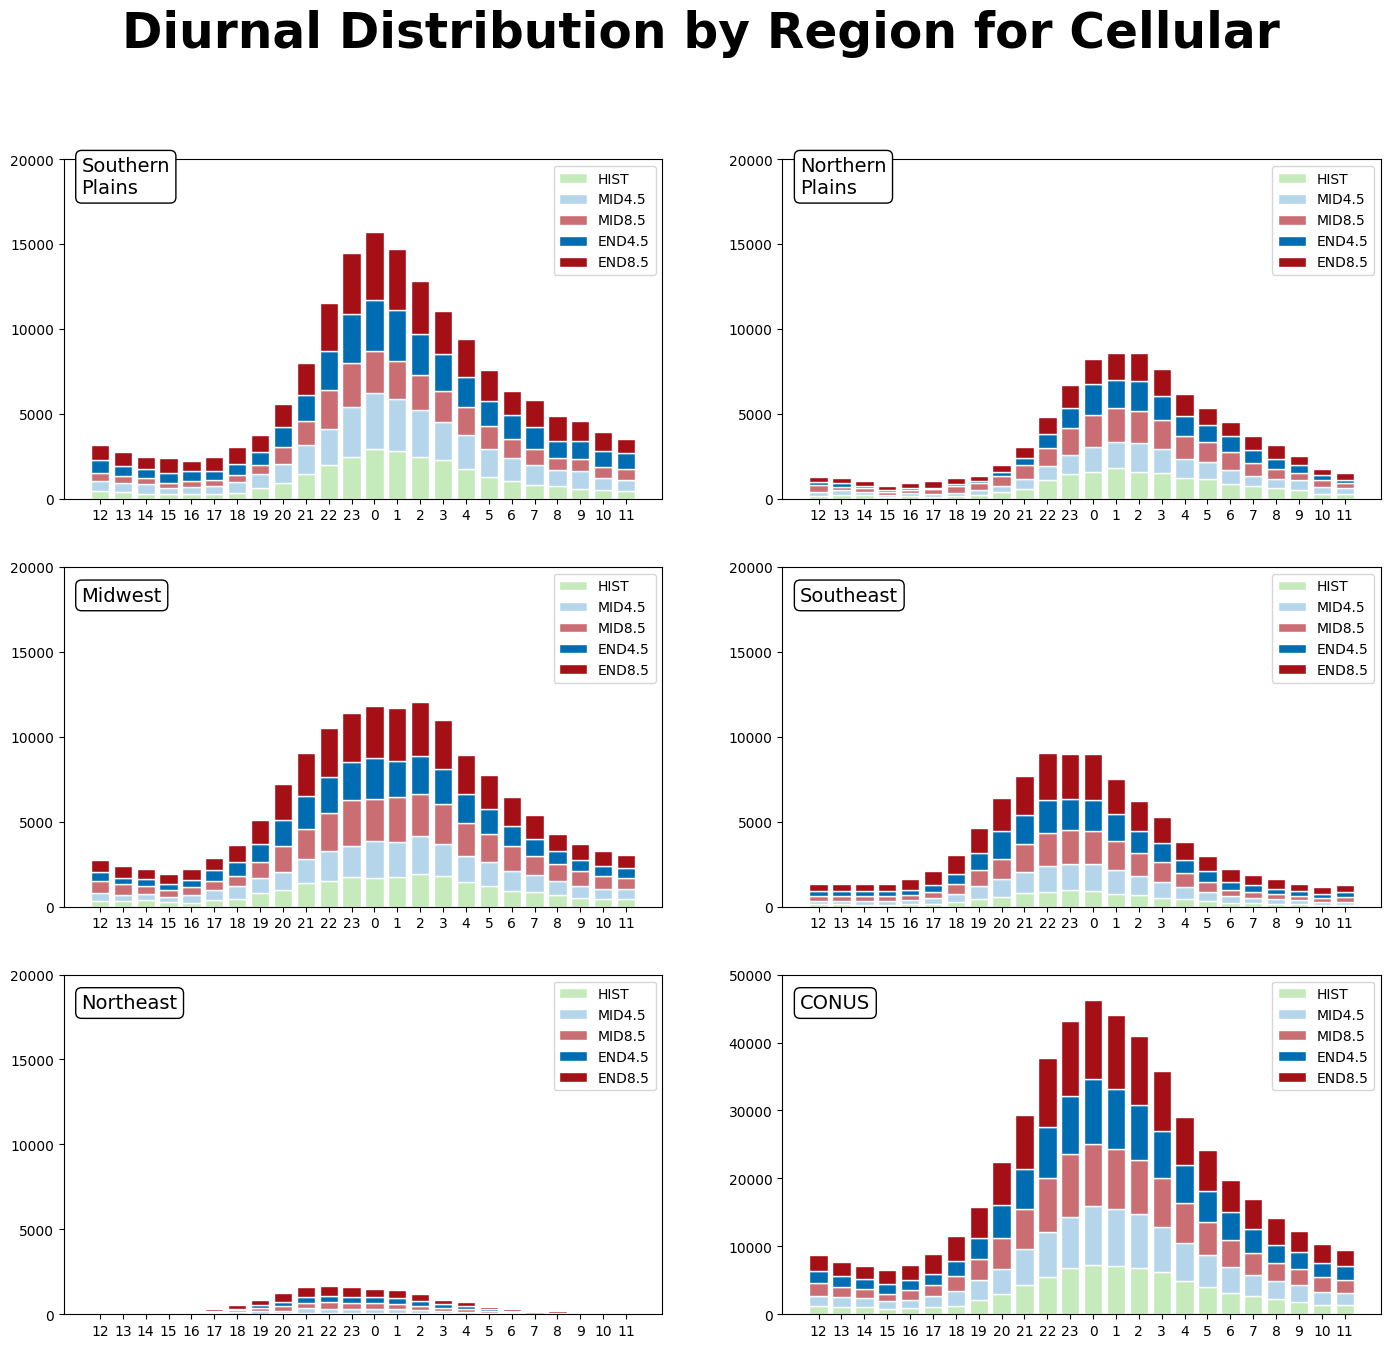

In [20]:
j = 1
fig = plt.figure(figsize=(17,15))

for key, value in regions.items():
    
    #figure specifications and plotting
    fig = plt.subplot(3, 2, j)
    for hour in np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]):
        epoch_bottom = 0
        i = 0
        for epoch in epochs:
            sub_df = locals()[f'df_{epoch}']
            sub_df = sub_df[((sub_df['New_Hour'] == hour) & (sub_df['Mode'] == 'Cellular') & (sub_df['STUSPS'].isin(value)))].copy()
            plt.bar(hour, len(sub_df), color=colors[i], edgecolor='white', bottom=epoch_bottom, width=0.8)
            epoch_bottom = epoch_bottom + len(sub_df)
            i = i + 1


    plt.xticks(np.arange(0,24,1), np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]))
    plt.legend(colors, labels=epoch_labels)
    plt.suptitle('Diurnal Distribution by Region for Cellular', size=35).set_weight('bold')
    plt.annotate(names[j-1], (0.03,0.9),fontsize=14, 
                 bbox=dict(boxstyle='round', facecolor='w', alpha=1), xycoords='axes fraction')
    
    if j == 6:
        plt.yticks(np.arange(0,50001,10000))
        
    else:
        plt.yticks(np.arange(0,20001,5000))
        
    j = j + 1
plt.savefig('/home/jcorner1/Future_Modes/Plots/diurnal_cellular.png', format='png', dpi=500, bbox_inches='tight')

/tmp/ipykernel_6776/2790908525.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/2790908525.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/2790908525.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/2790908525.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/2790908525.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/2790908525.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(col

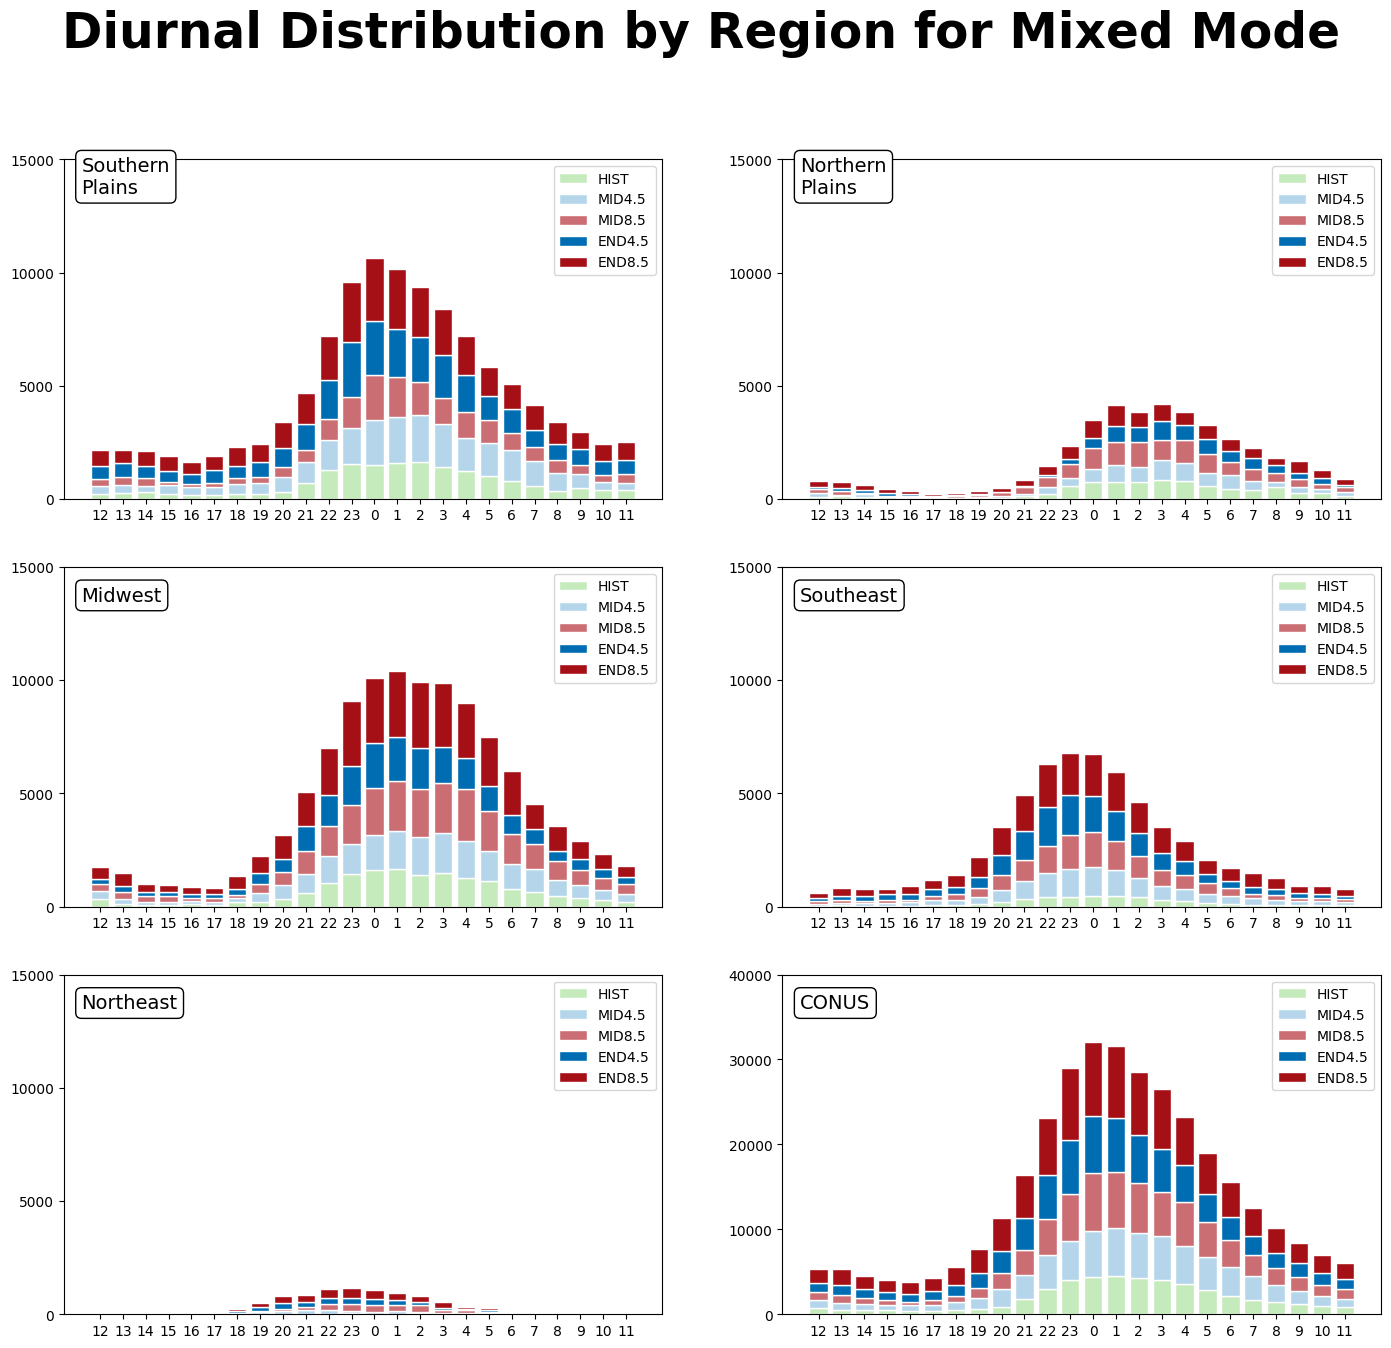

In [21]:
j = 1
fig = plt.figure(figsize=(17,15))

for key, value in regions.items():
    
    #figure specifications and plotting
    fig = plt.subplot(3, 2, j)
    for hour in np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]):
        epoch_bottom = 0
        i = 0
        for epoch in epochs:
            sub_df = locals()[f'df_{epoch}']
            sub_df = sub_df[((sub_df['New_Hour'] == hour) & (sub_df['Mode'] == 'Multicell') & (sub_df['STUSPS'].isin(value)))].copy()
            plt.bar(hour, len(sub_df), color=colors[i], edgecolor='white', bottom=epoch_bottom, width=0.8)
            epoch_bottom = epoch_bottom + len(sub_df)
            i = i + 1


    plt.xticks(np.arange(0,24,1), np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]))
    plt.legend(colors, labels=epoch_labels)
    plt.suptitle('Diurnal Distribution by Region for Mixed Mode', size=35).set_weight('bold')
    plt.annotate(names[j-1], (0.03,0.9),fontsize=14, 
                 bbox=dict(boxstyle='round', facecolor='w', alpha=1), xycoords='axes fraction')
    
    if j == 6:
        plt.yticks(np.arange(0,40001,10000))
        
    else:
        plt.yticks(np.arange(0,15001,5000))
        
    j = j + 1
    
plt.savefig('/home/jcorner1/Future_Modes/Plots/diurnal_mixed_mode.png', format='png', dpi=500, bbox_inches='tight')

/tmp/ipykernel_6776/3763988489.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/3763988489.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/3763988489.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/3763988489.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/3763988489.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels)
/tmp/ipykernel_6776/3763988489.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(col

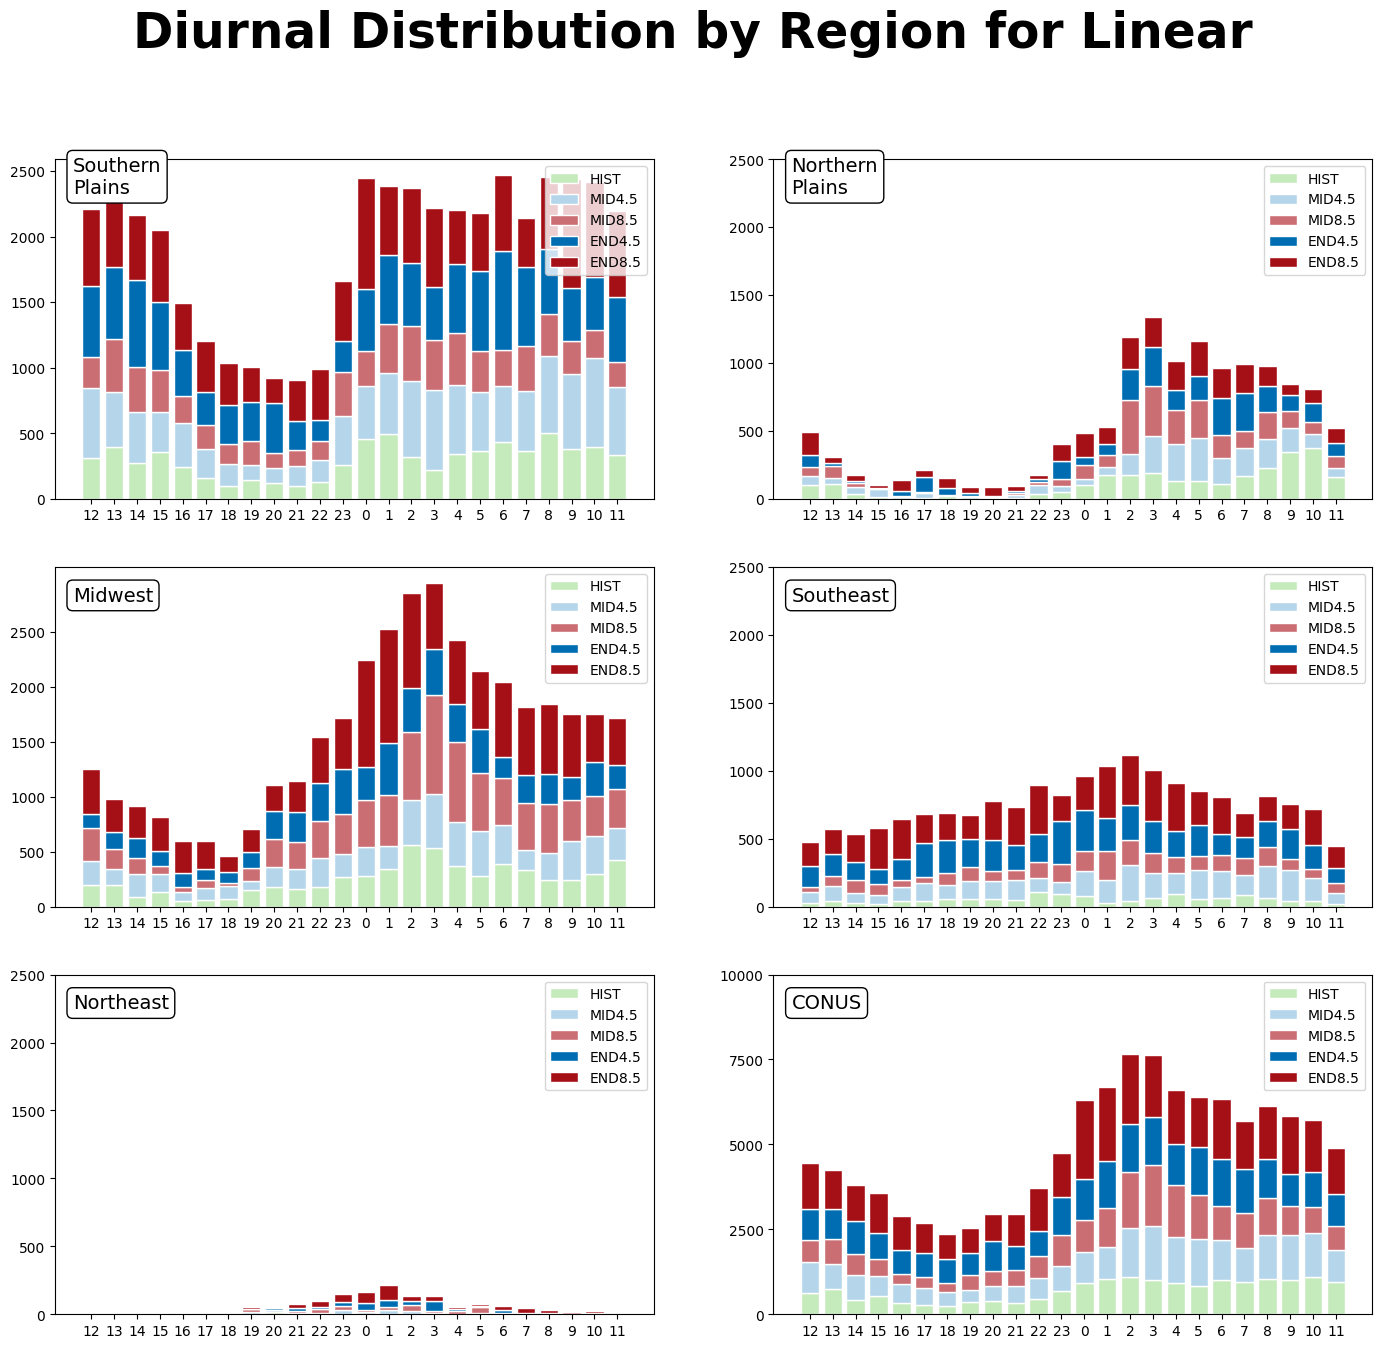

In [22]:
j = 1
fig = plt.figure(figsize=(17,15))

for key, value in regions.items():
    
    #figure specifications and plotting
    fig = plt.subplot(3, 2, j)
    for hour in np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]):
        epoch_bottom = 0
        i = 0
        for epoch in epochs:
            sub_df = locals()[f'df_{epoch}']
            sub_df = sub_df[((sub_df['New_Hour'] == hour) & (sub_df['Mode'] == 'Linear') & (sub_df['STUSPS'].isin(value)))].copy()
            plt.bar(hour, len(sub_df), color=colors[i], edgecolor='white', bottom=epoch_bottom, width=0.8)
            epoch_bottom = epoch_bottom + len(sub_df)
            i = i + 1


    plt.xticks(np.arange(0,24,1), np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]))
    plt.legend(colors, labels=epoch_labels)
    plt.suptitle('Diurnal Distribution by Region for Linear', size=35).set_weight('bold')
    plt.annotate(names[j-1], (0.03,0.9),fontsize=14, 
                 bbox=dict(boxstyle='round', facecolor='w', alpha=1), xycoords='axes fraction')
    
    if j == 6:
        plt.yticks(np.arange(0,10001,2500))
        
    else:
        plt.yticks(np.arange(0,2501,500))
        
    j = j + 1
plt.savefig('/home/jcorner1/Future_Modes/Plots/diurnal_linear.png', format='png', dpi=500, bbox_inches='tight')